Import packages

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # default figure size
plt.rcParams['font.size'] = 12           # default font size
plt.rcParams['font.family'] = 'Times New Roman'

Read data

In [54]:
data_path = '../data/energydata_complete_raw.csv'

df = pd.read_csv(data_path)
print("Raw size of the dataset:", df.shape)

print("First 5 rows of the dataset:")
print(df.head())

# remove columns "rv2"
df.drop(columns=['rv2'], inplace=True)
print("Cleaned size of the dataset:", df.shape)

Raw size of the dataset: (19735, 29)
First 5 rows of the dataset:
               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

  

Data info and description

In [55]:
print("Dataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  flo

Transform data column into datatime object

In [56]:
date_format = "%d-%m-%Y %H:%M"
df['date'] = pd.to_datetime(df['date'], format=date_format, errors='raise')

Target variable analysis (Appliances)

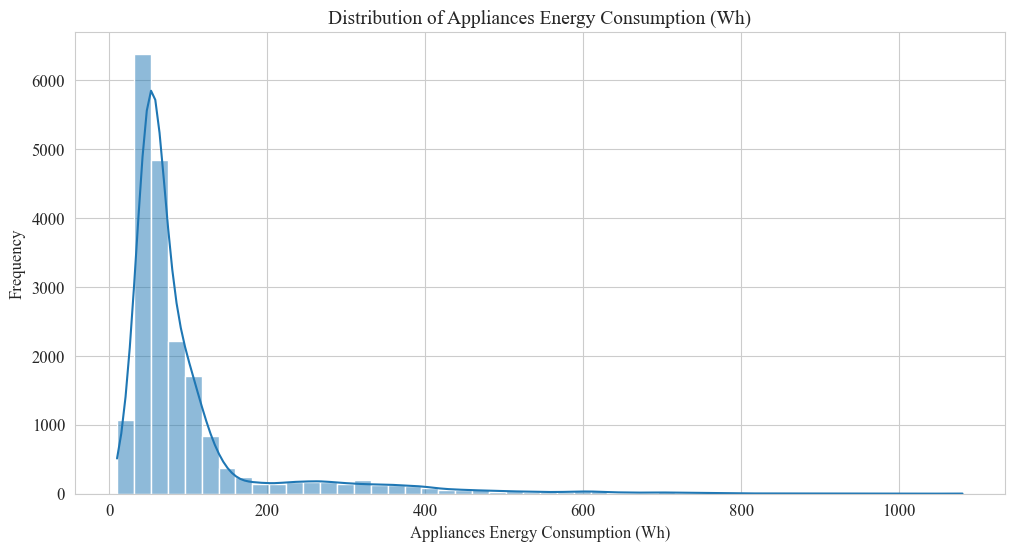

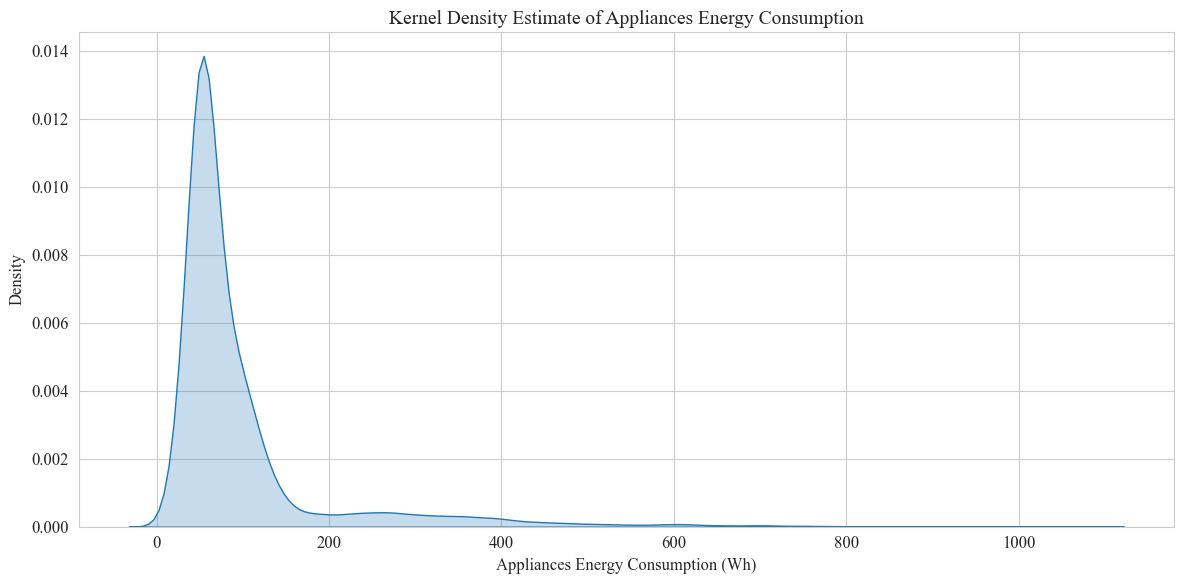


Appliances Descriptive Statistics:


count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

Skewness: 3.39
Kurtosis: 13.67


<Figure size 1200x600 with 0 Axes>

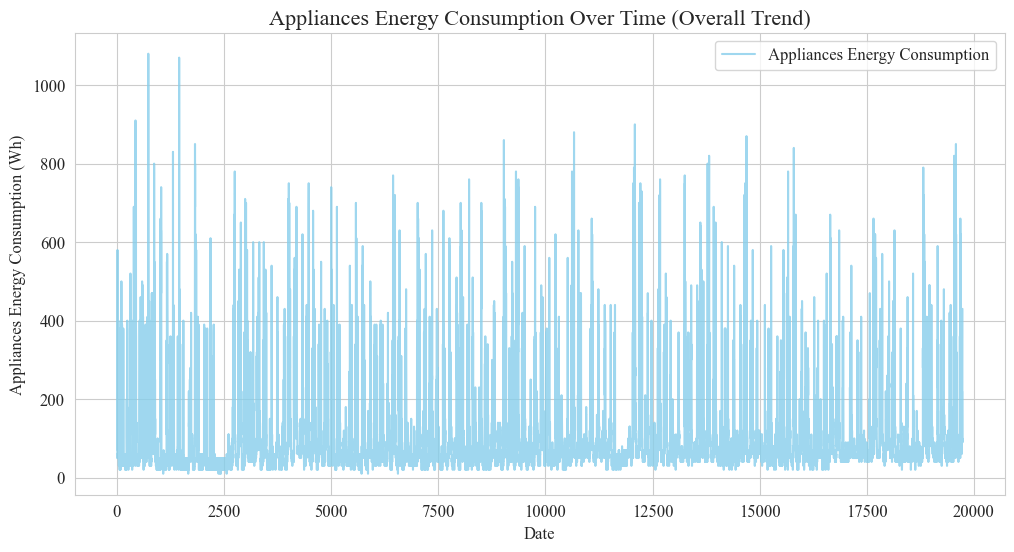

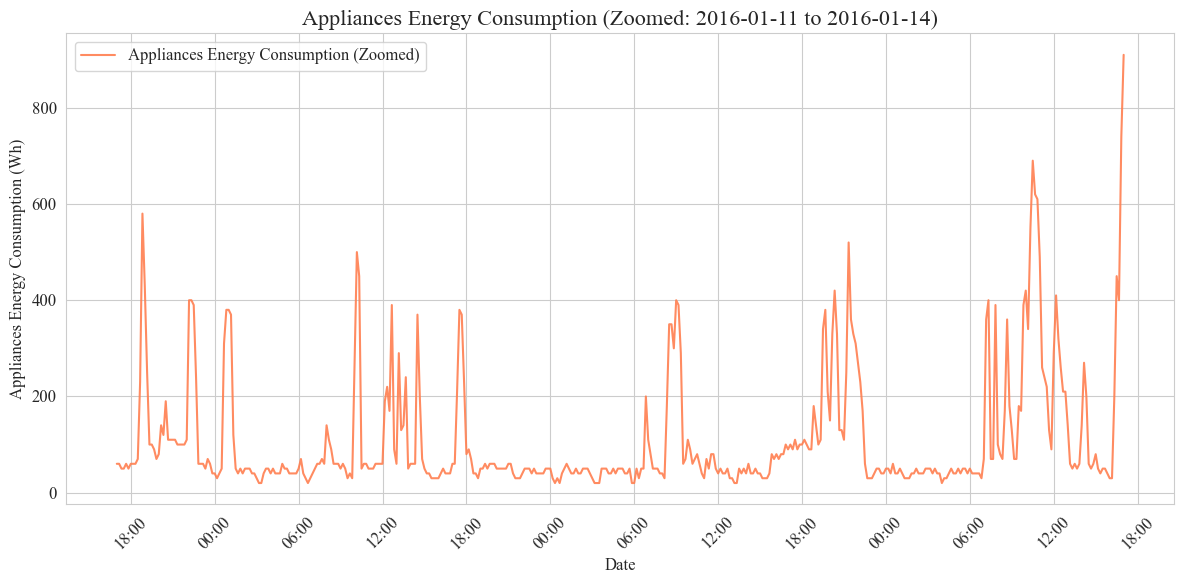

In [ ]:
# Histogram and KDE plot for Appliances

# Histogram plot
plt.figure()
sns.histplot(df['Appliances'], kde=True, bins=50)
plt.title('Distribution of Appliances Energy Consumption (Wh)', fontsize=14)
plt.xlabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Kernel density estimate (KDE) plot
plt.figure()
sns.kdeplot(df['Appliances'], fill=True)
plt.title('Kernel Density Estimate of Appliances Energy Consumption', fontsize=14)
plt.xlabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

plt.savefig('../results/eda_plots/appliances_distribution.png')



# Calculate descriptive statistics for Appliances
print("\nAppliances Descriptive Statistics:")
appliances_stats = df['Appliances'].describe()
appliances_skew = df['Appliances'].skew()
appliances_kurt = df['Appliances'].kurt()

display(appliances_stats)
print(f"Skewness: {appliances_skew:.2f}")
print(f"Kurtosis: {appliances_kurt:.2f}")



# Time series plot for Appliances
plt.figure()
plt.plot(df.index, df['Appliances'], label='Appliances Energy Consumption', color='skyblue', alpha=0.8)
plt.title('Appliances Energy Consumption Over Time (Overall Trend)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('../results/eda_plots/appliances_time_series_overall.png')

# Zoomed-in time series plot for Appliances (first 3 days)
start_date_zoom = df['date'].min()
end_date_zoom = start_date_zoom + pd.Timedelta(days=3)

# Extract the first 3 days of data
df_zoom = df[(df['date'] >= start_date_zoom) & (df['date'] <= end_date_zoom)]


plt.figure()
# Use df_zoom['date'] as the x-axis
plt.plot(df_zoom['date'],
            df_zoom['Appliances'],
            label='Appliances Energy Consumption (Zoomed)', color='coral', alpha=0.9)
plt.title(f'Appliances Energy Consumption (Zoomed: {start_date_zoom.strftime("%Y-%m-%d")} to {end_date_zoom.strftime("%Y-%m-%d")})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.legend()
plt.grid(True)

# Set x-axis major ticks to hourly intervals
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=6))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../results/eda_plots/appliances_time_series.png')

Feature variable analysis

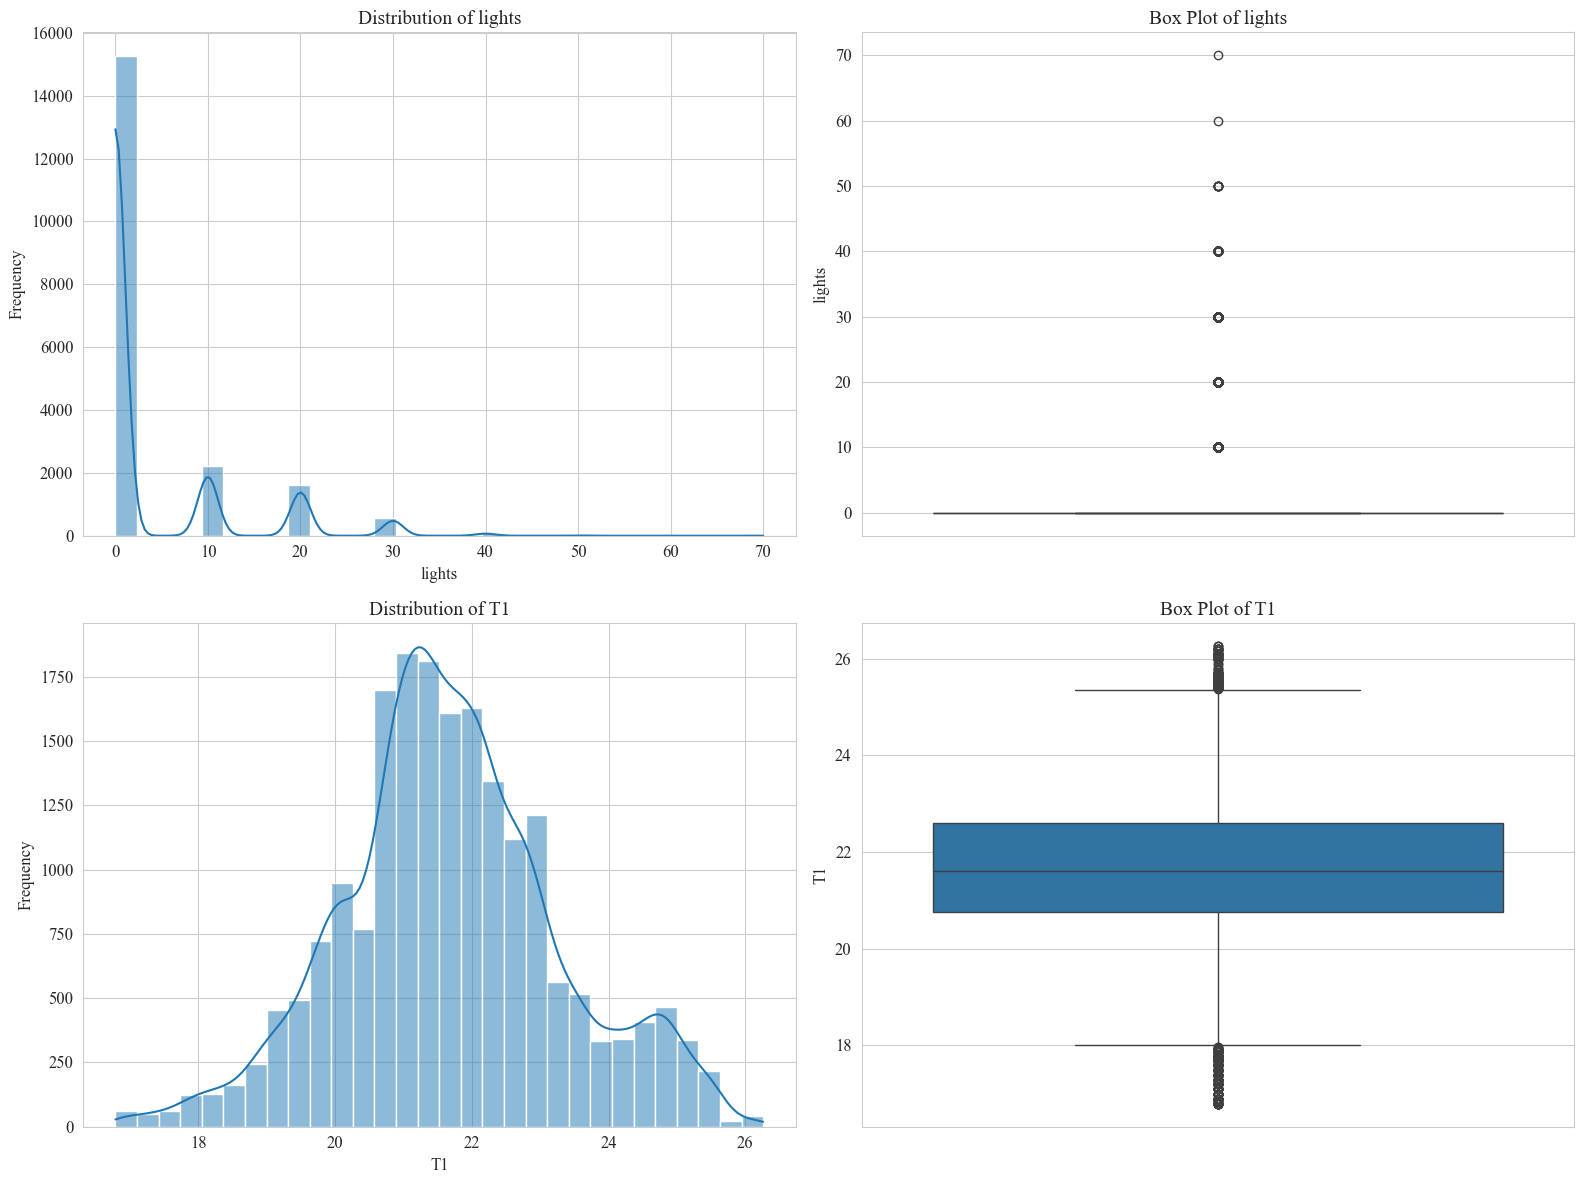

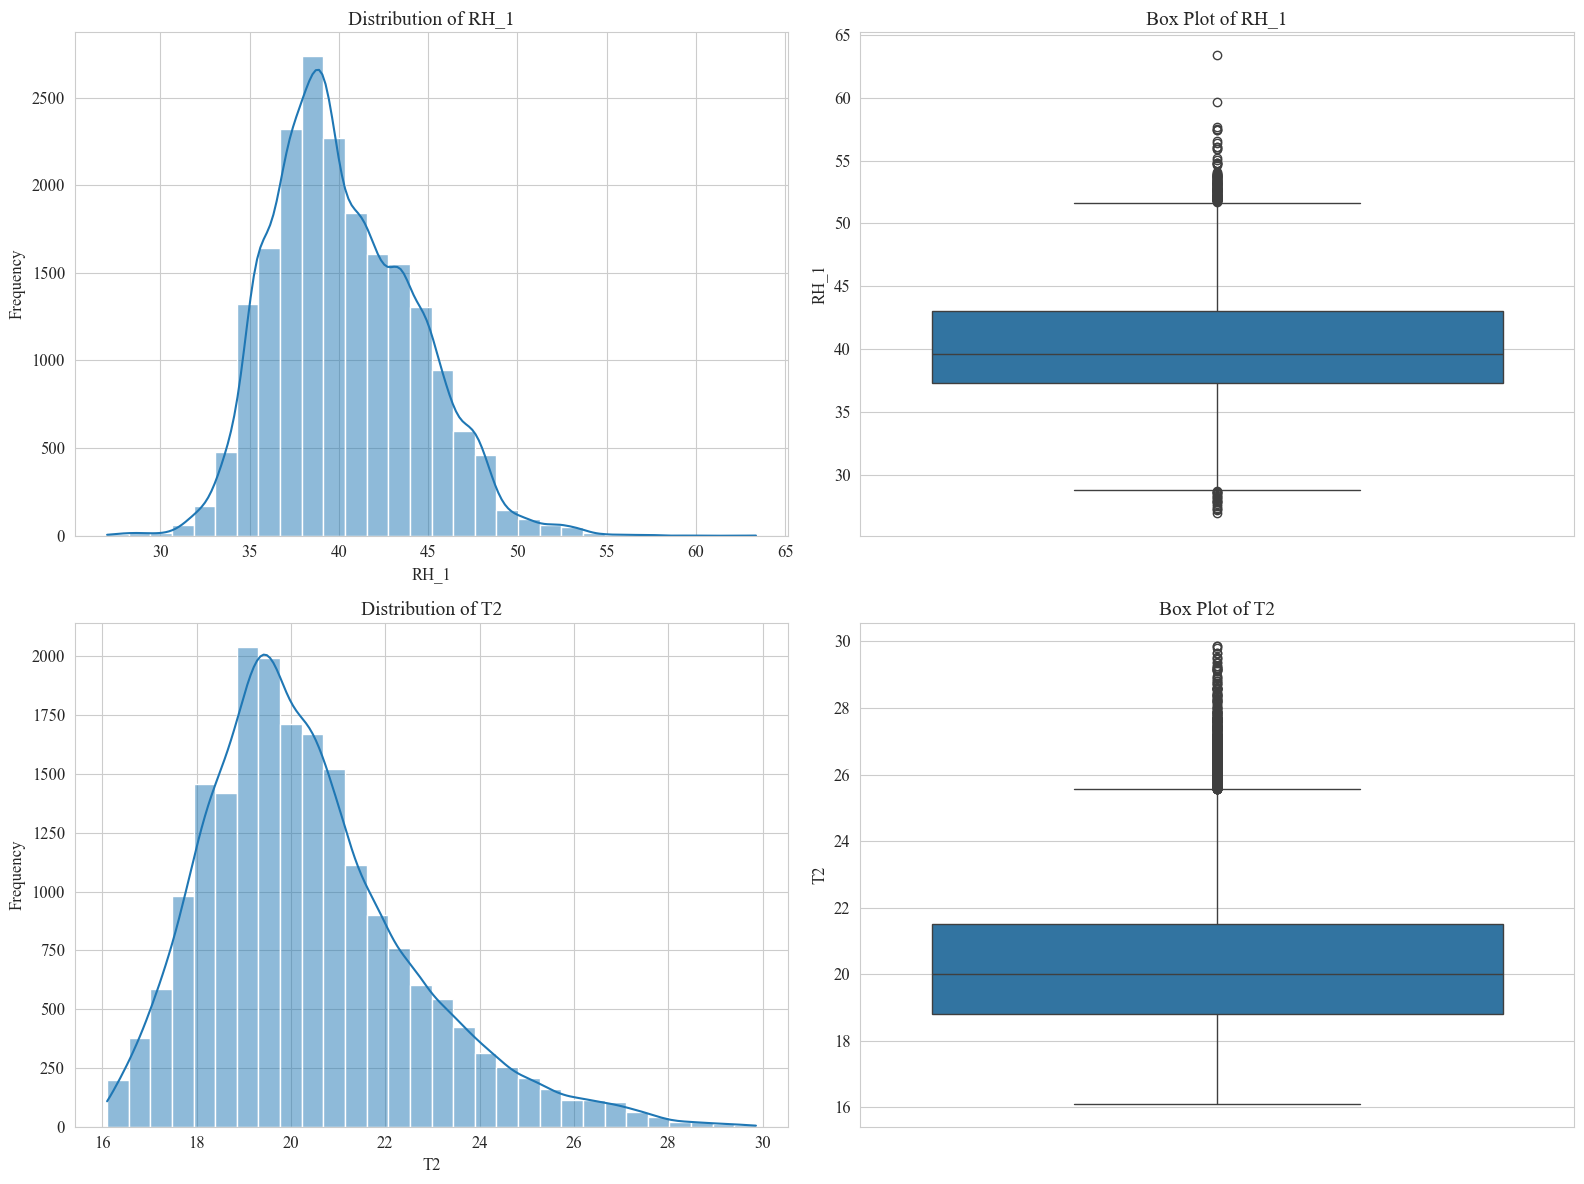

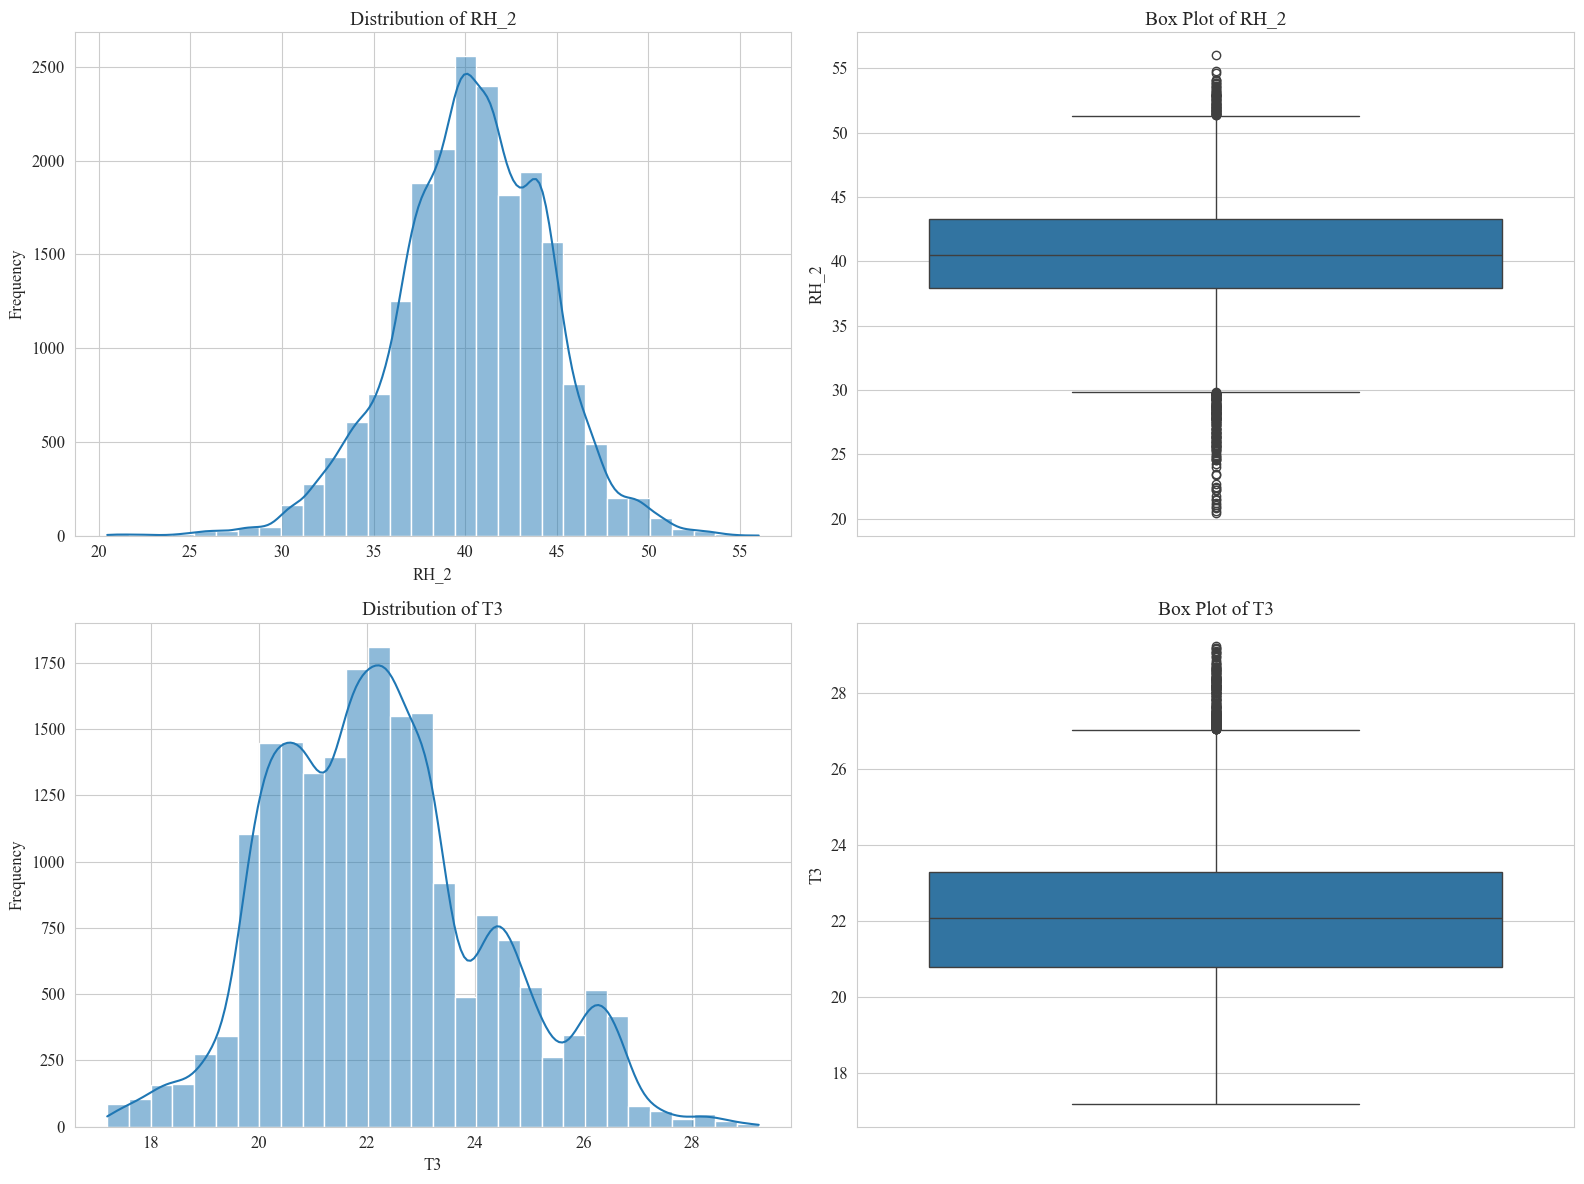

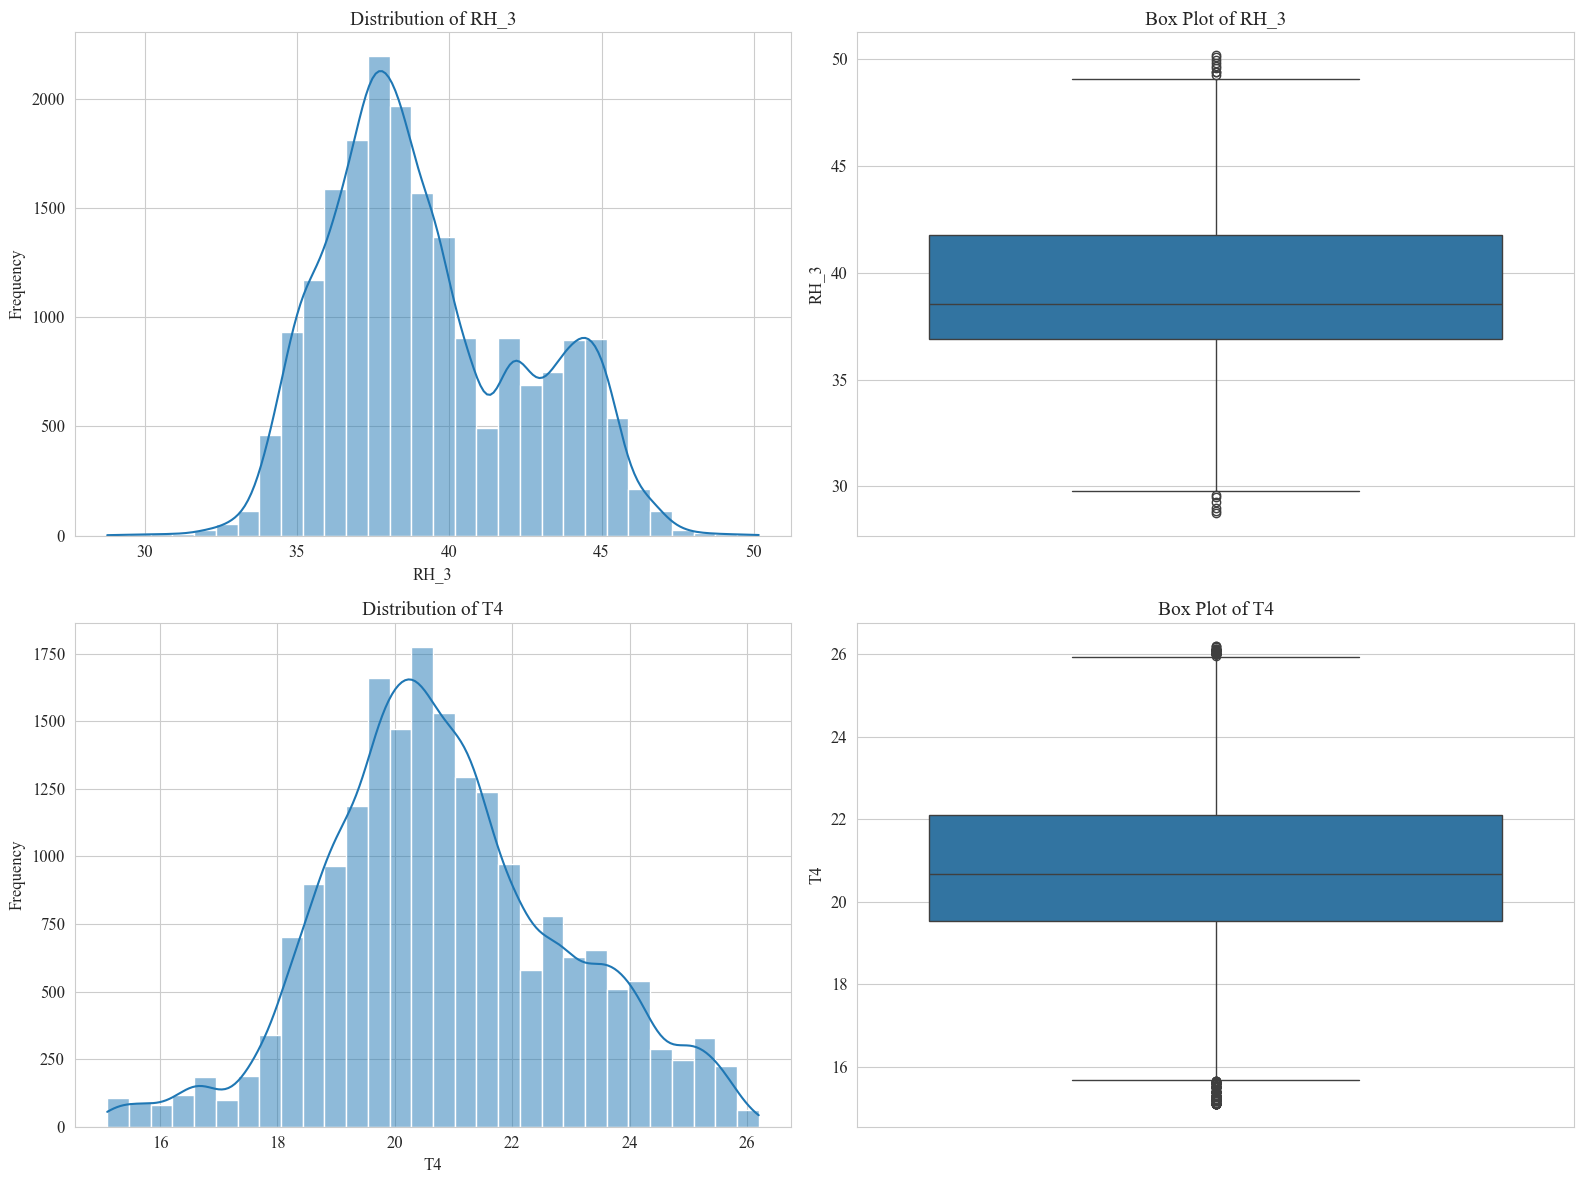

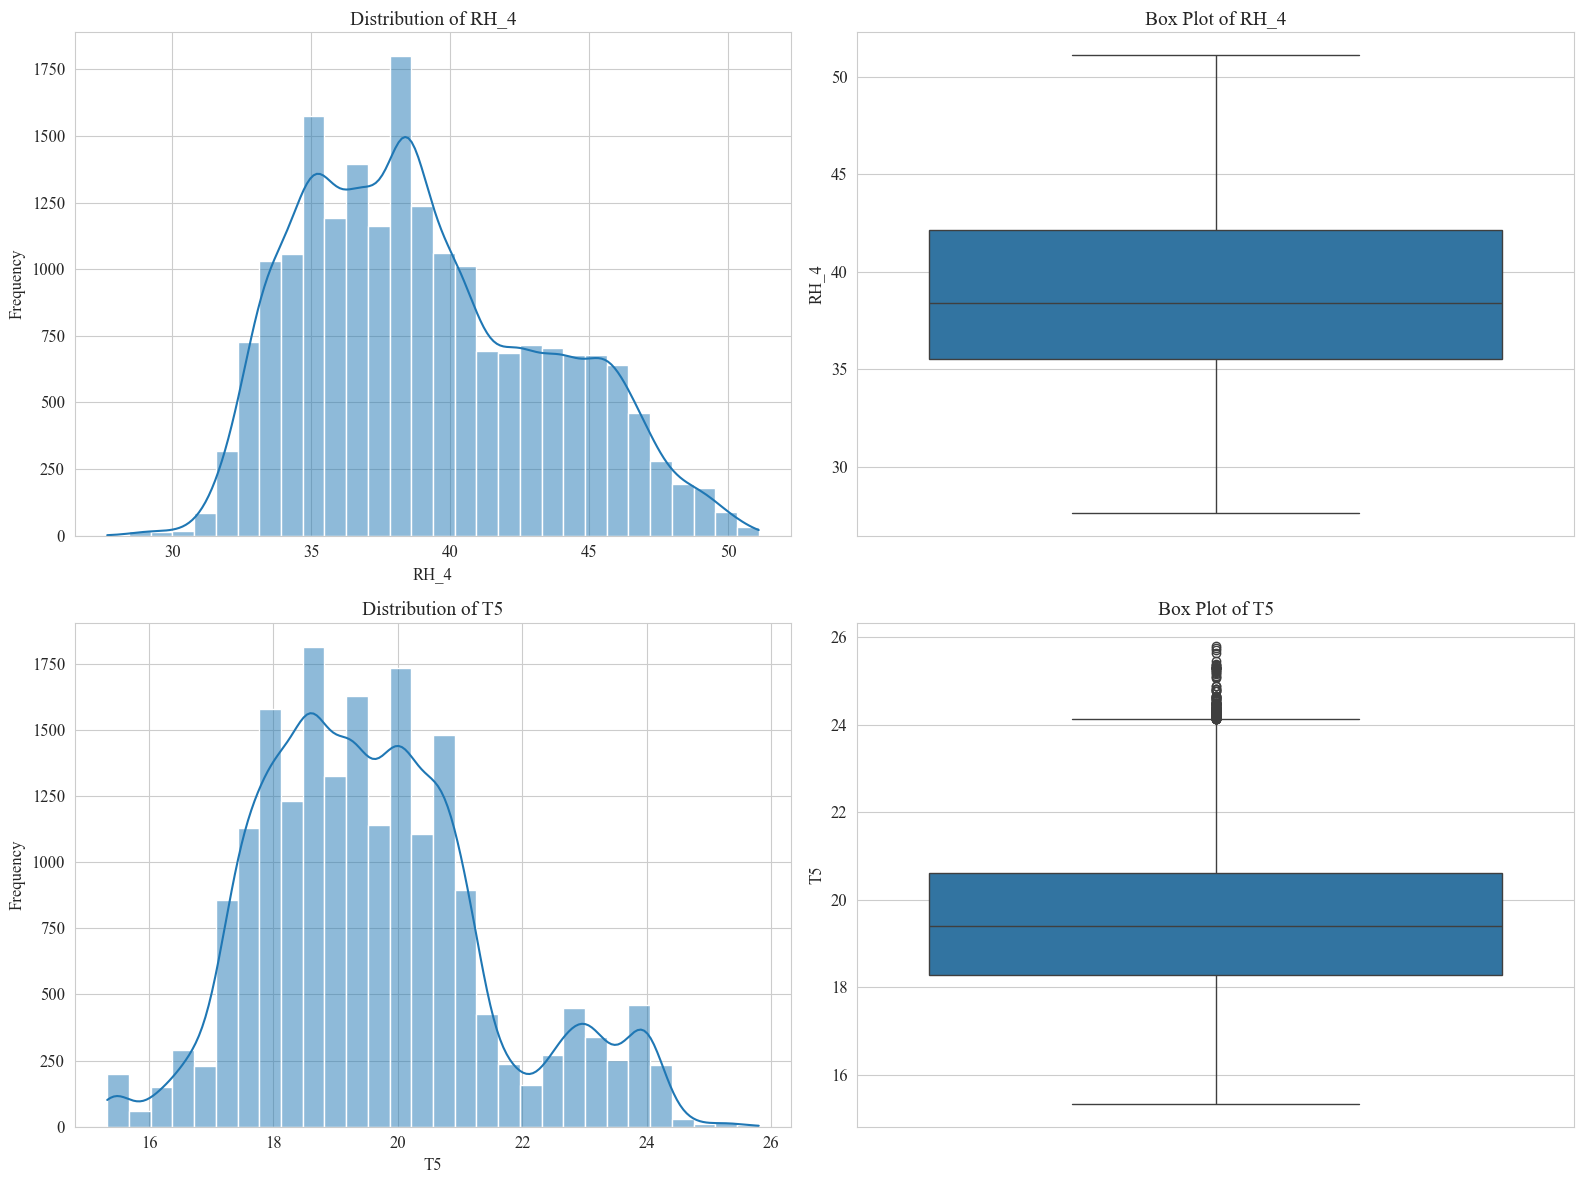

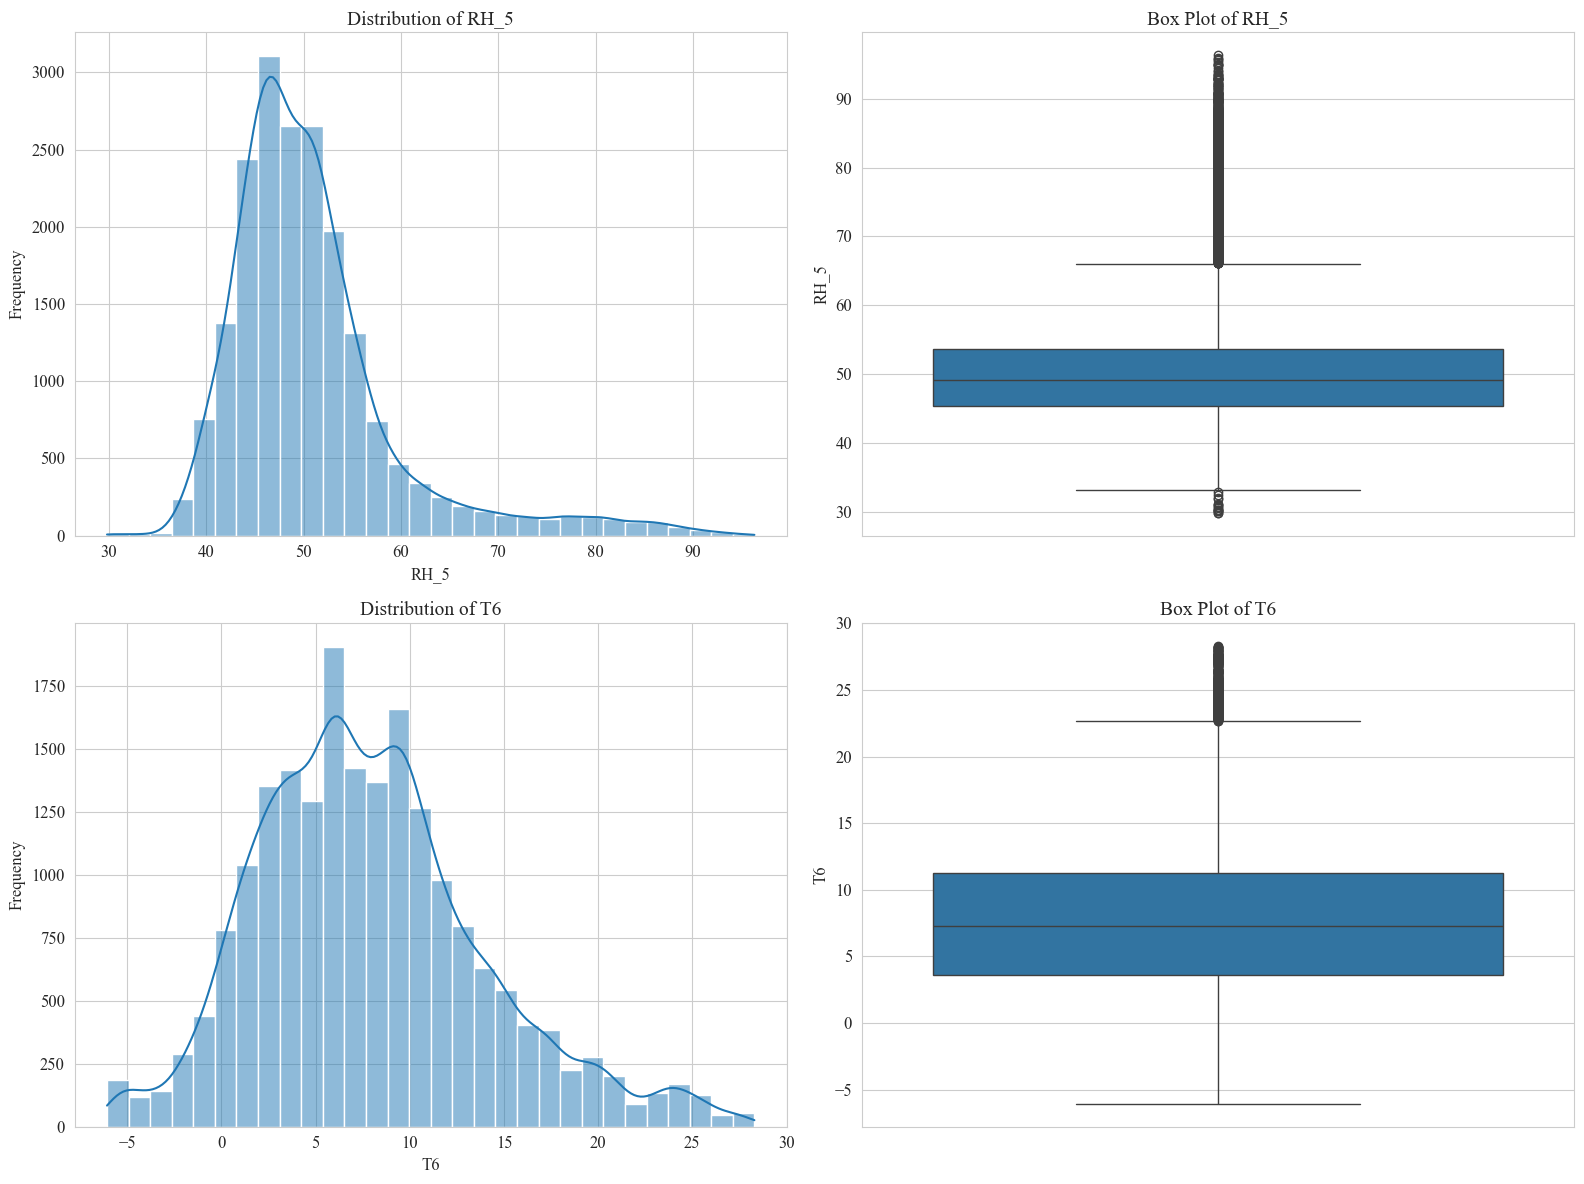

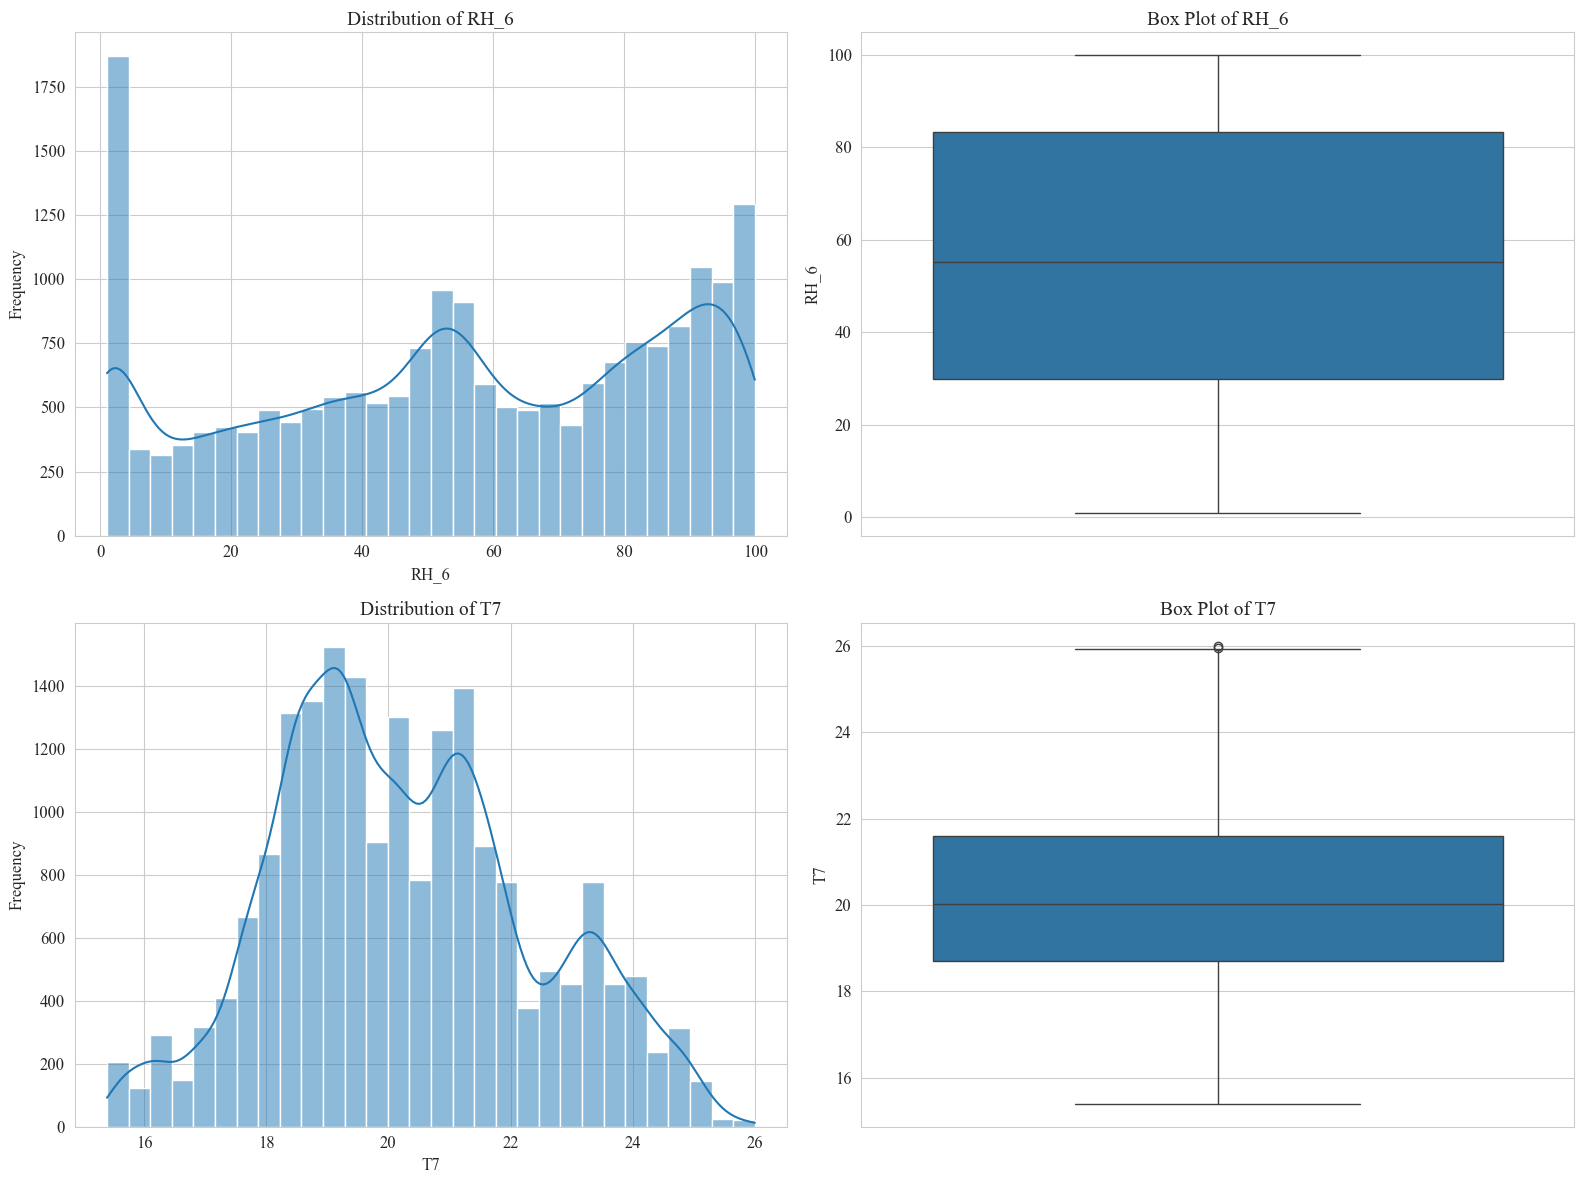

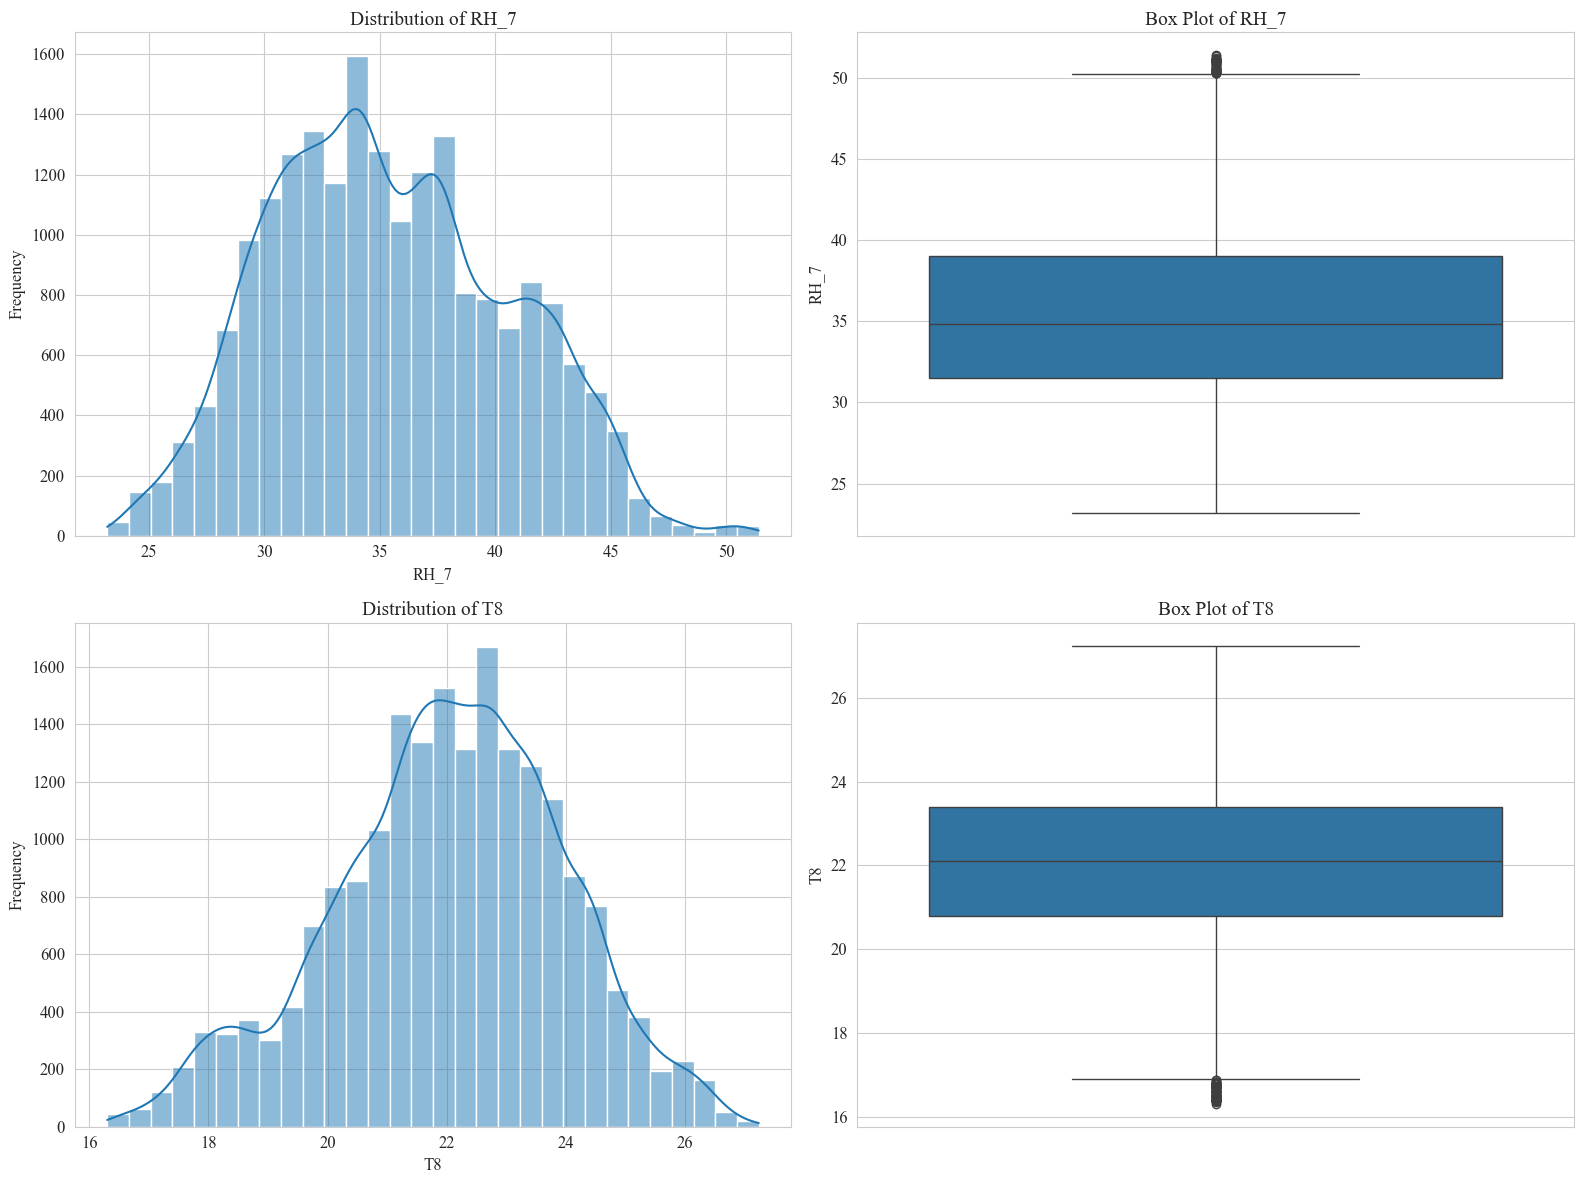

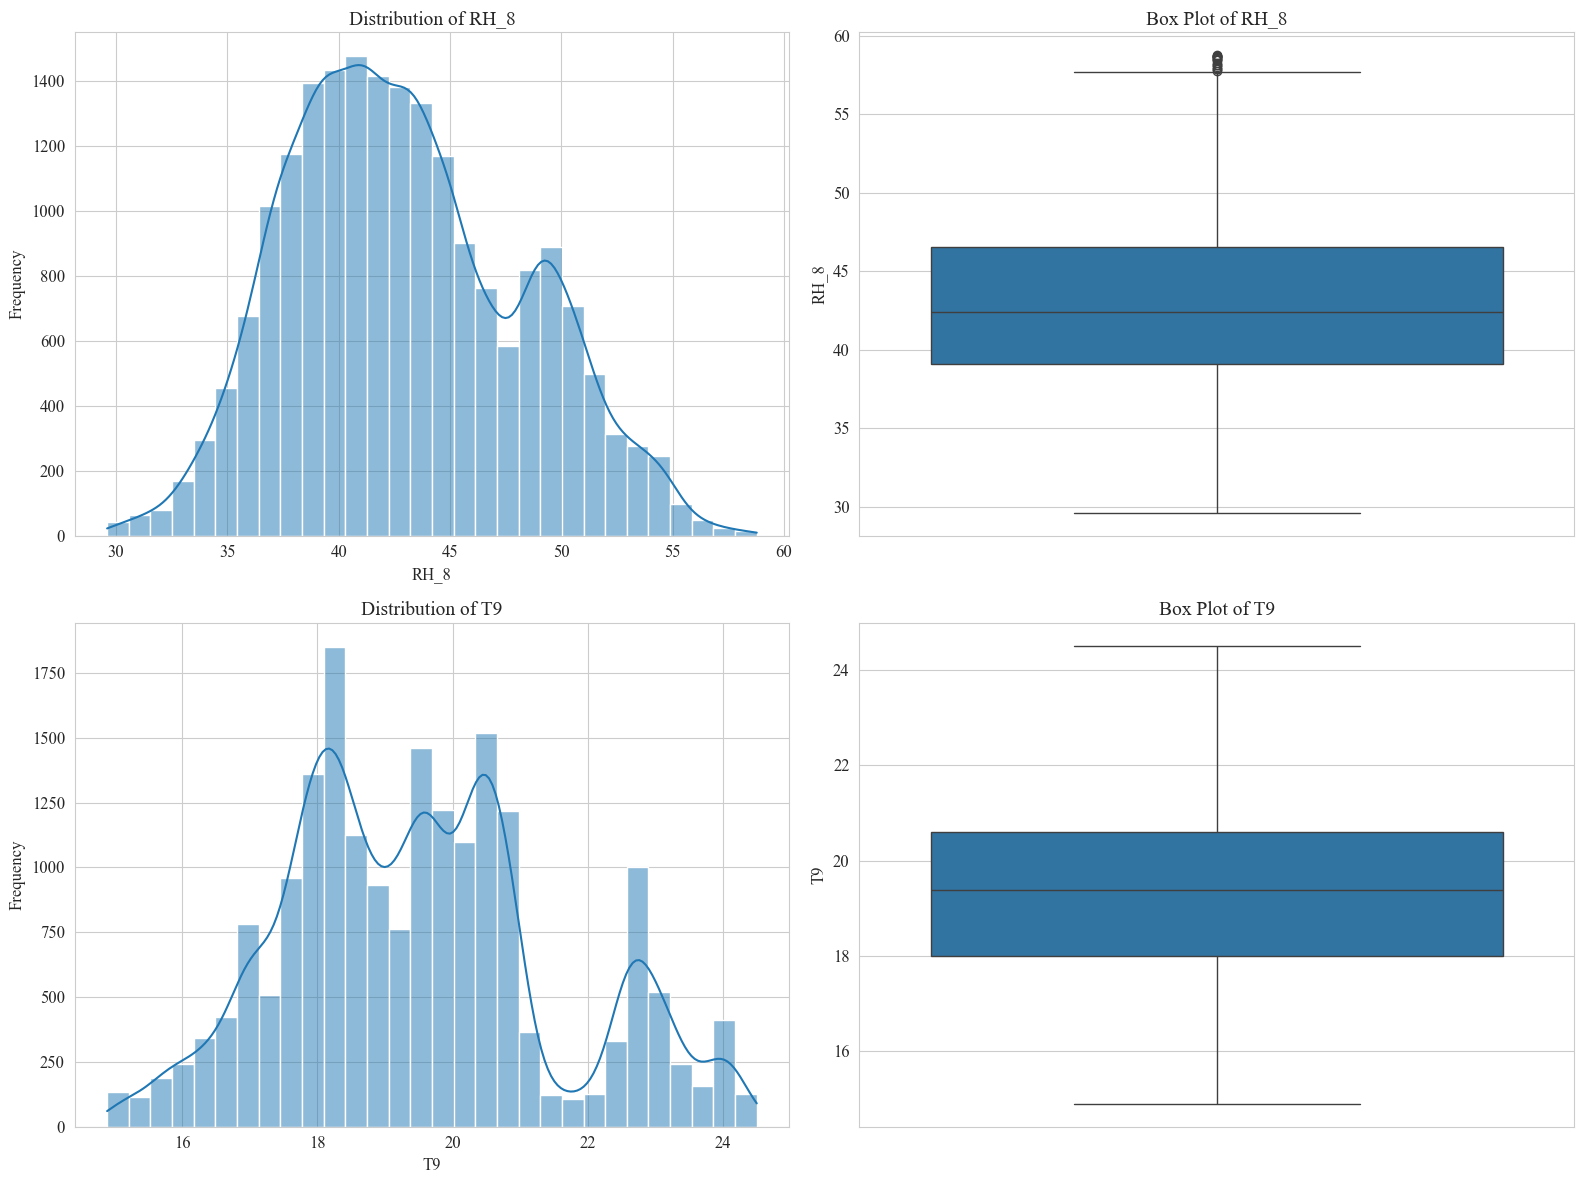

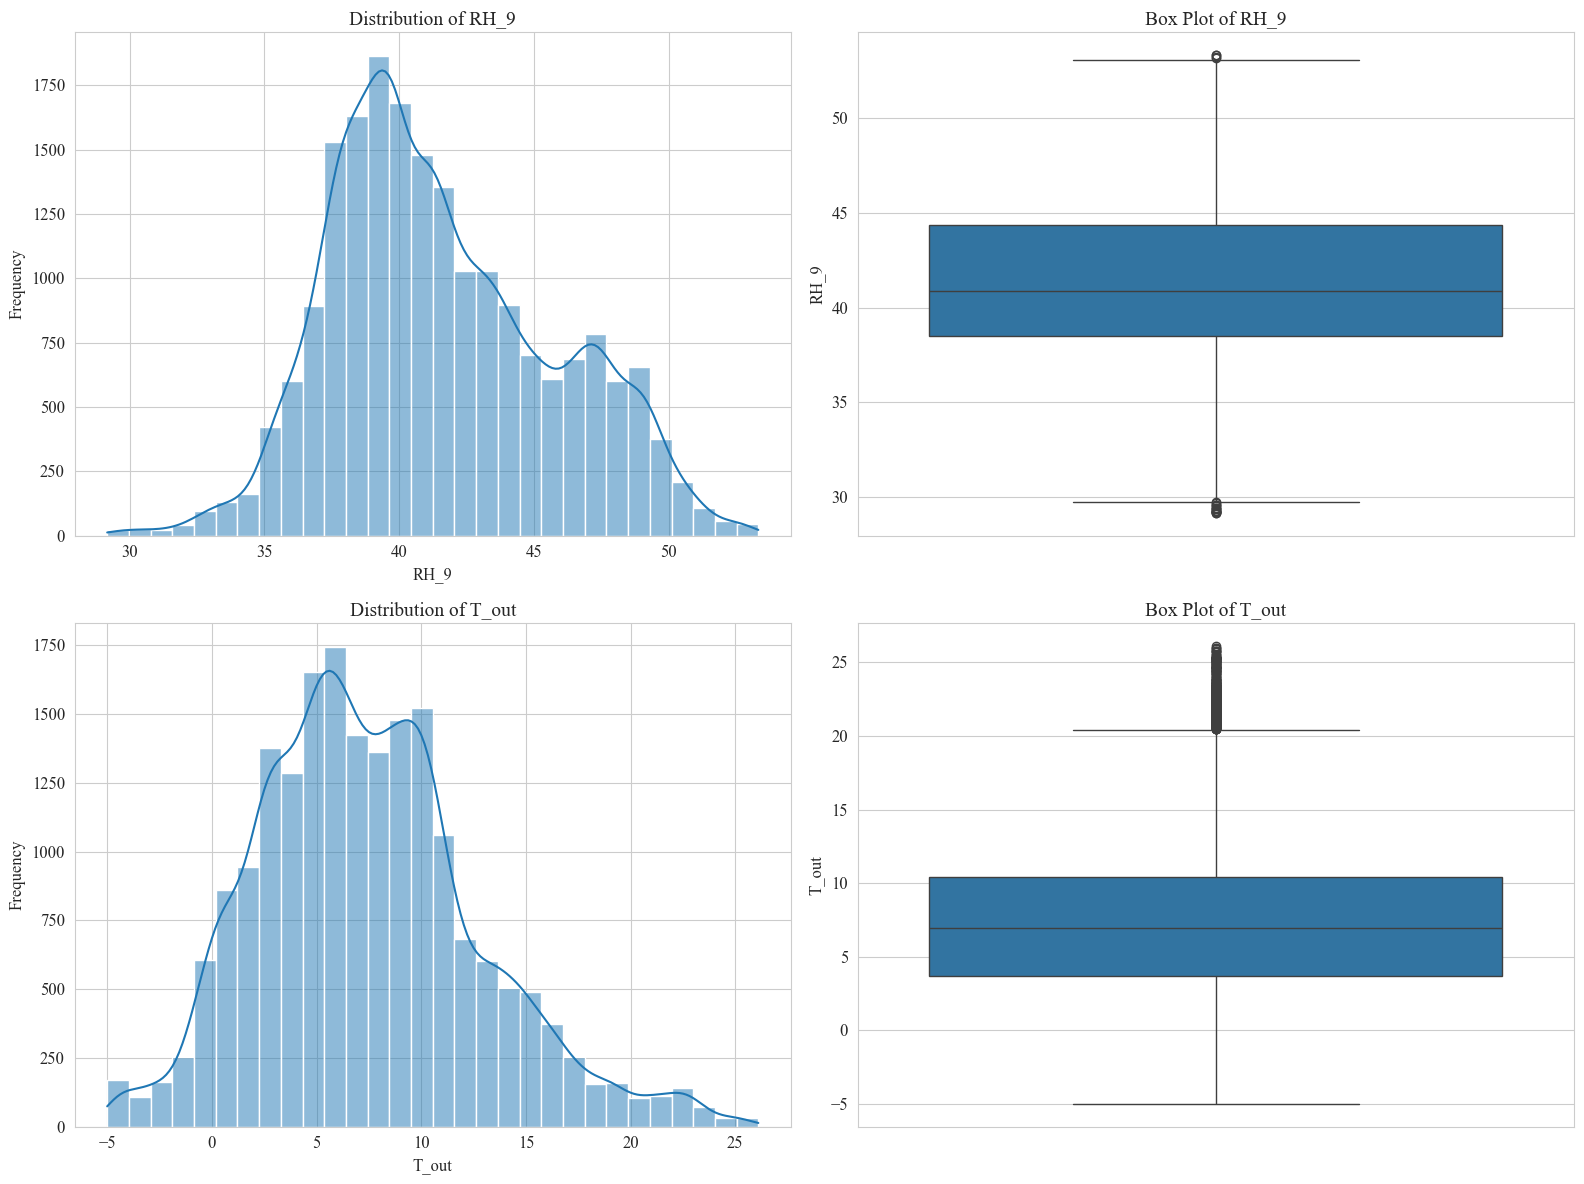

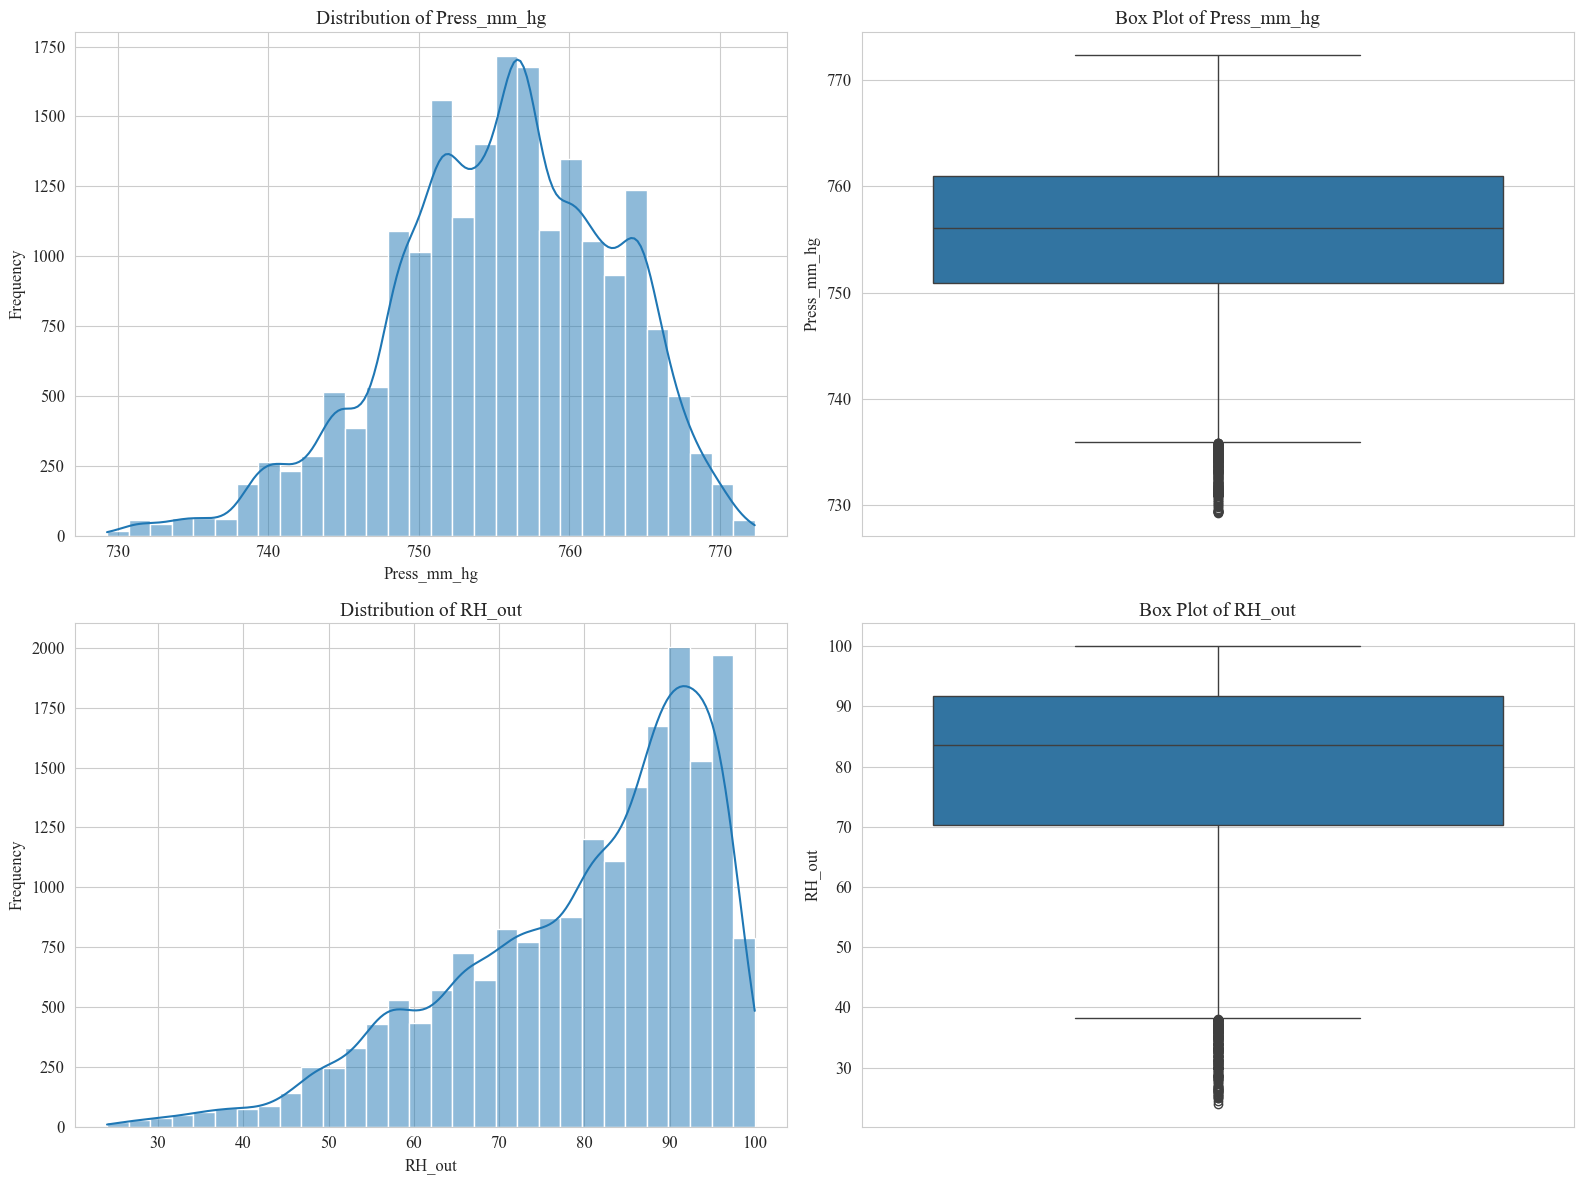

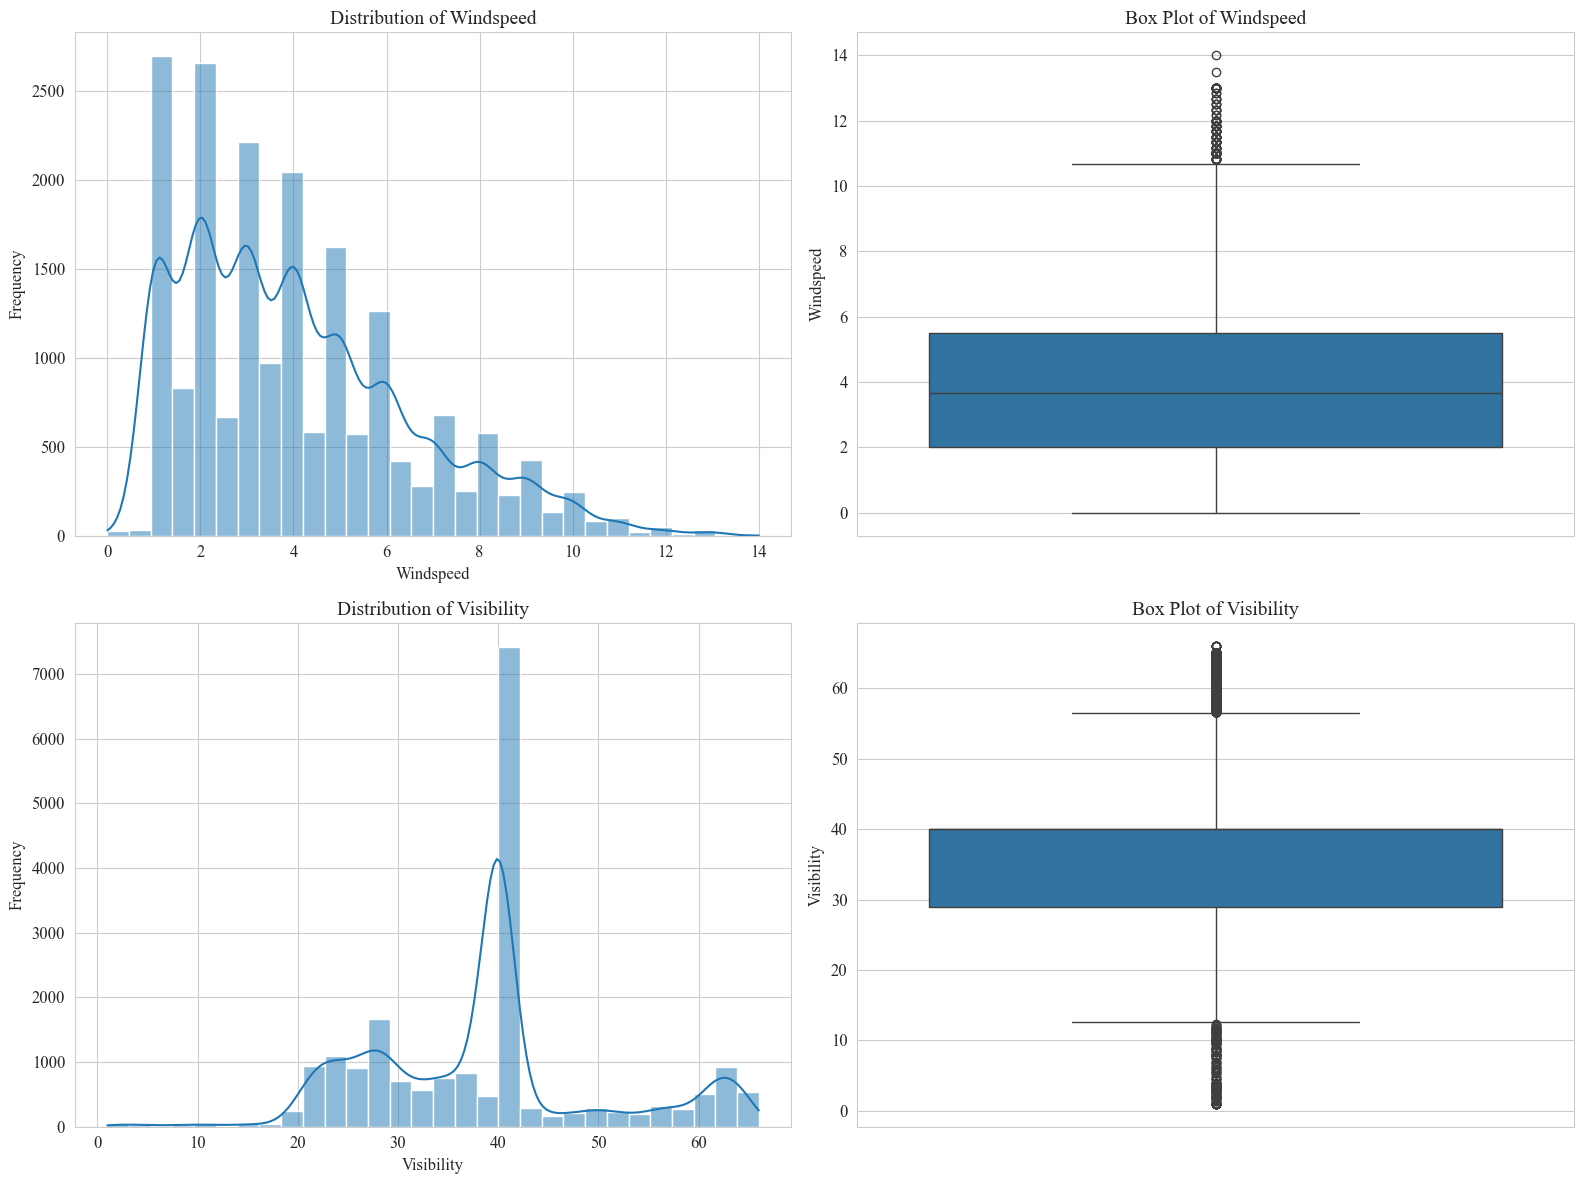

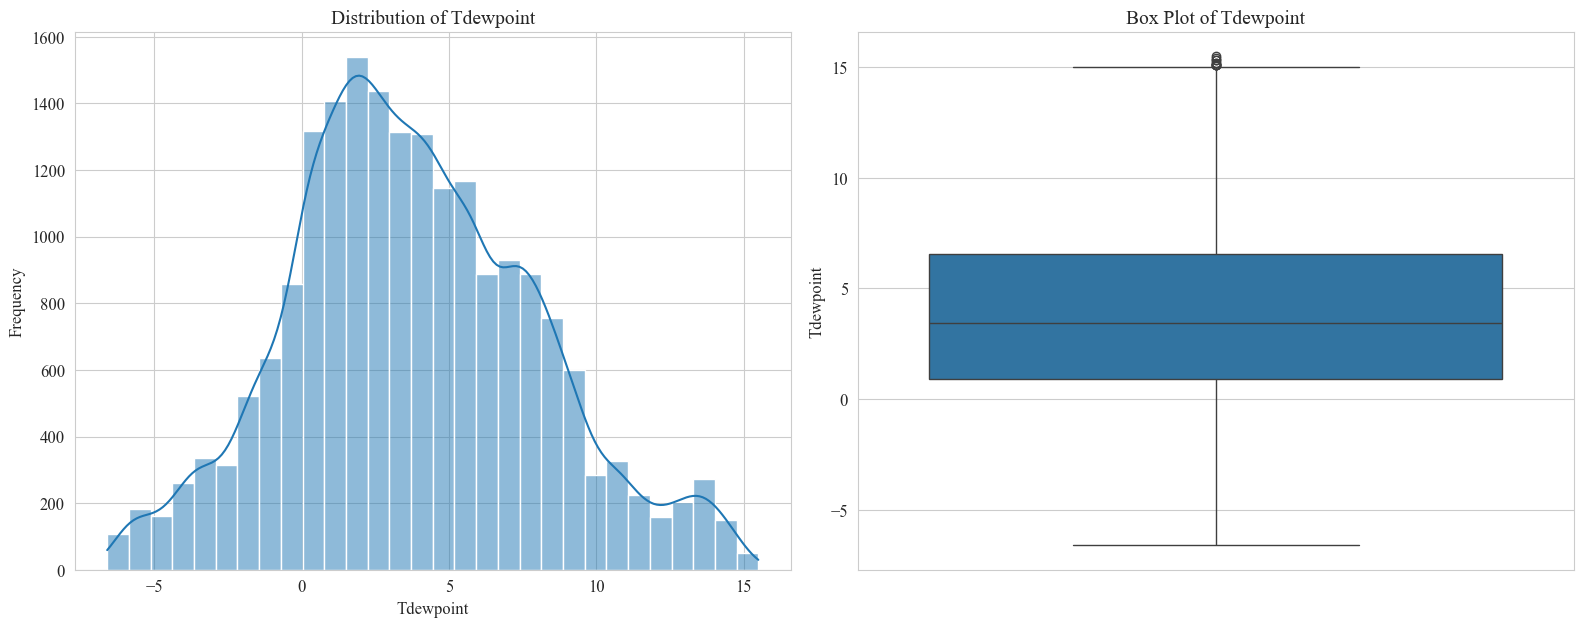


--- 7.2 关键特征的时间序列趋势 ---


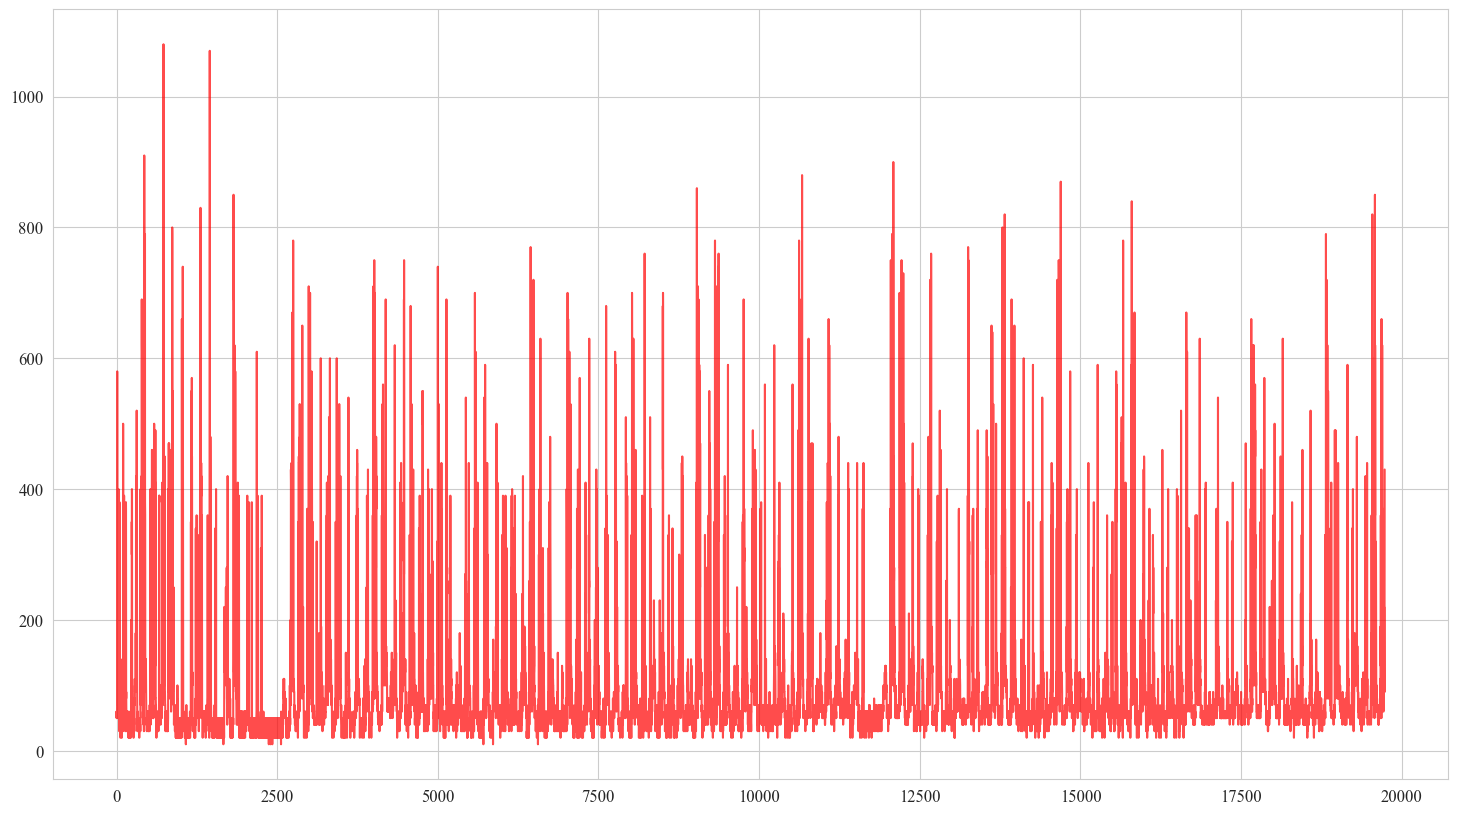

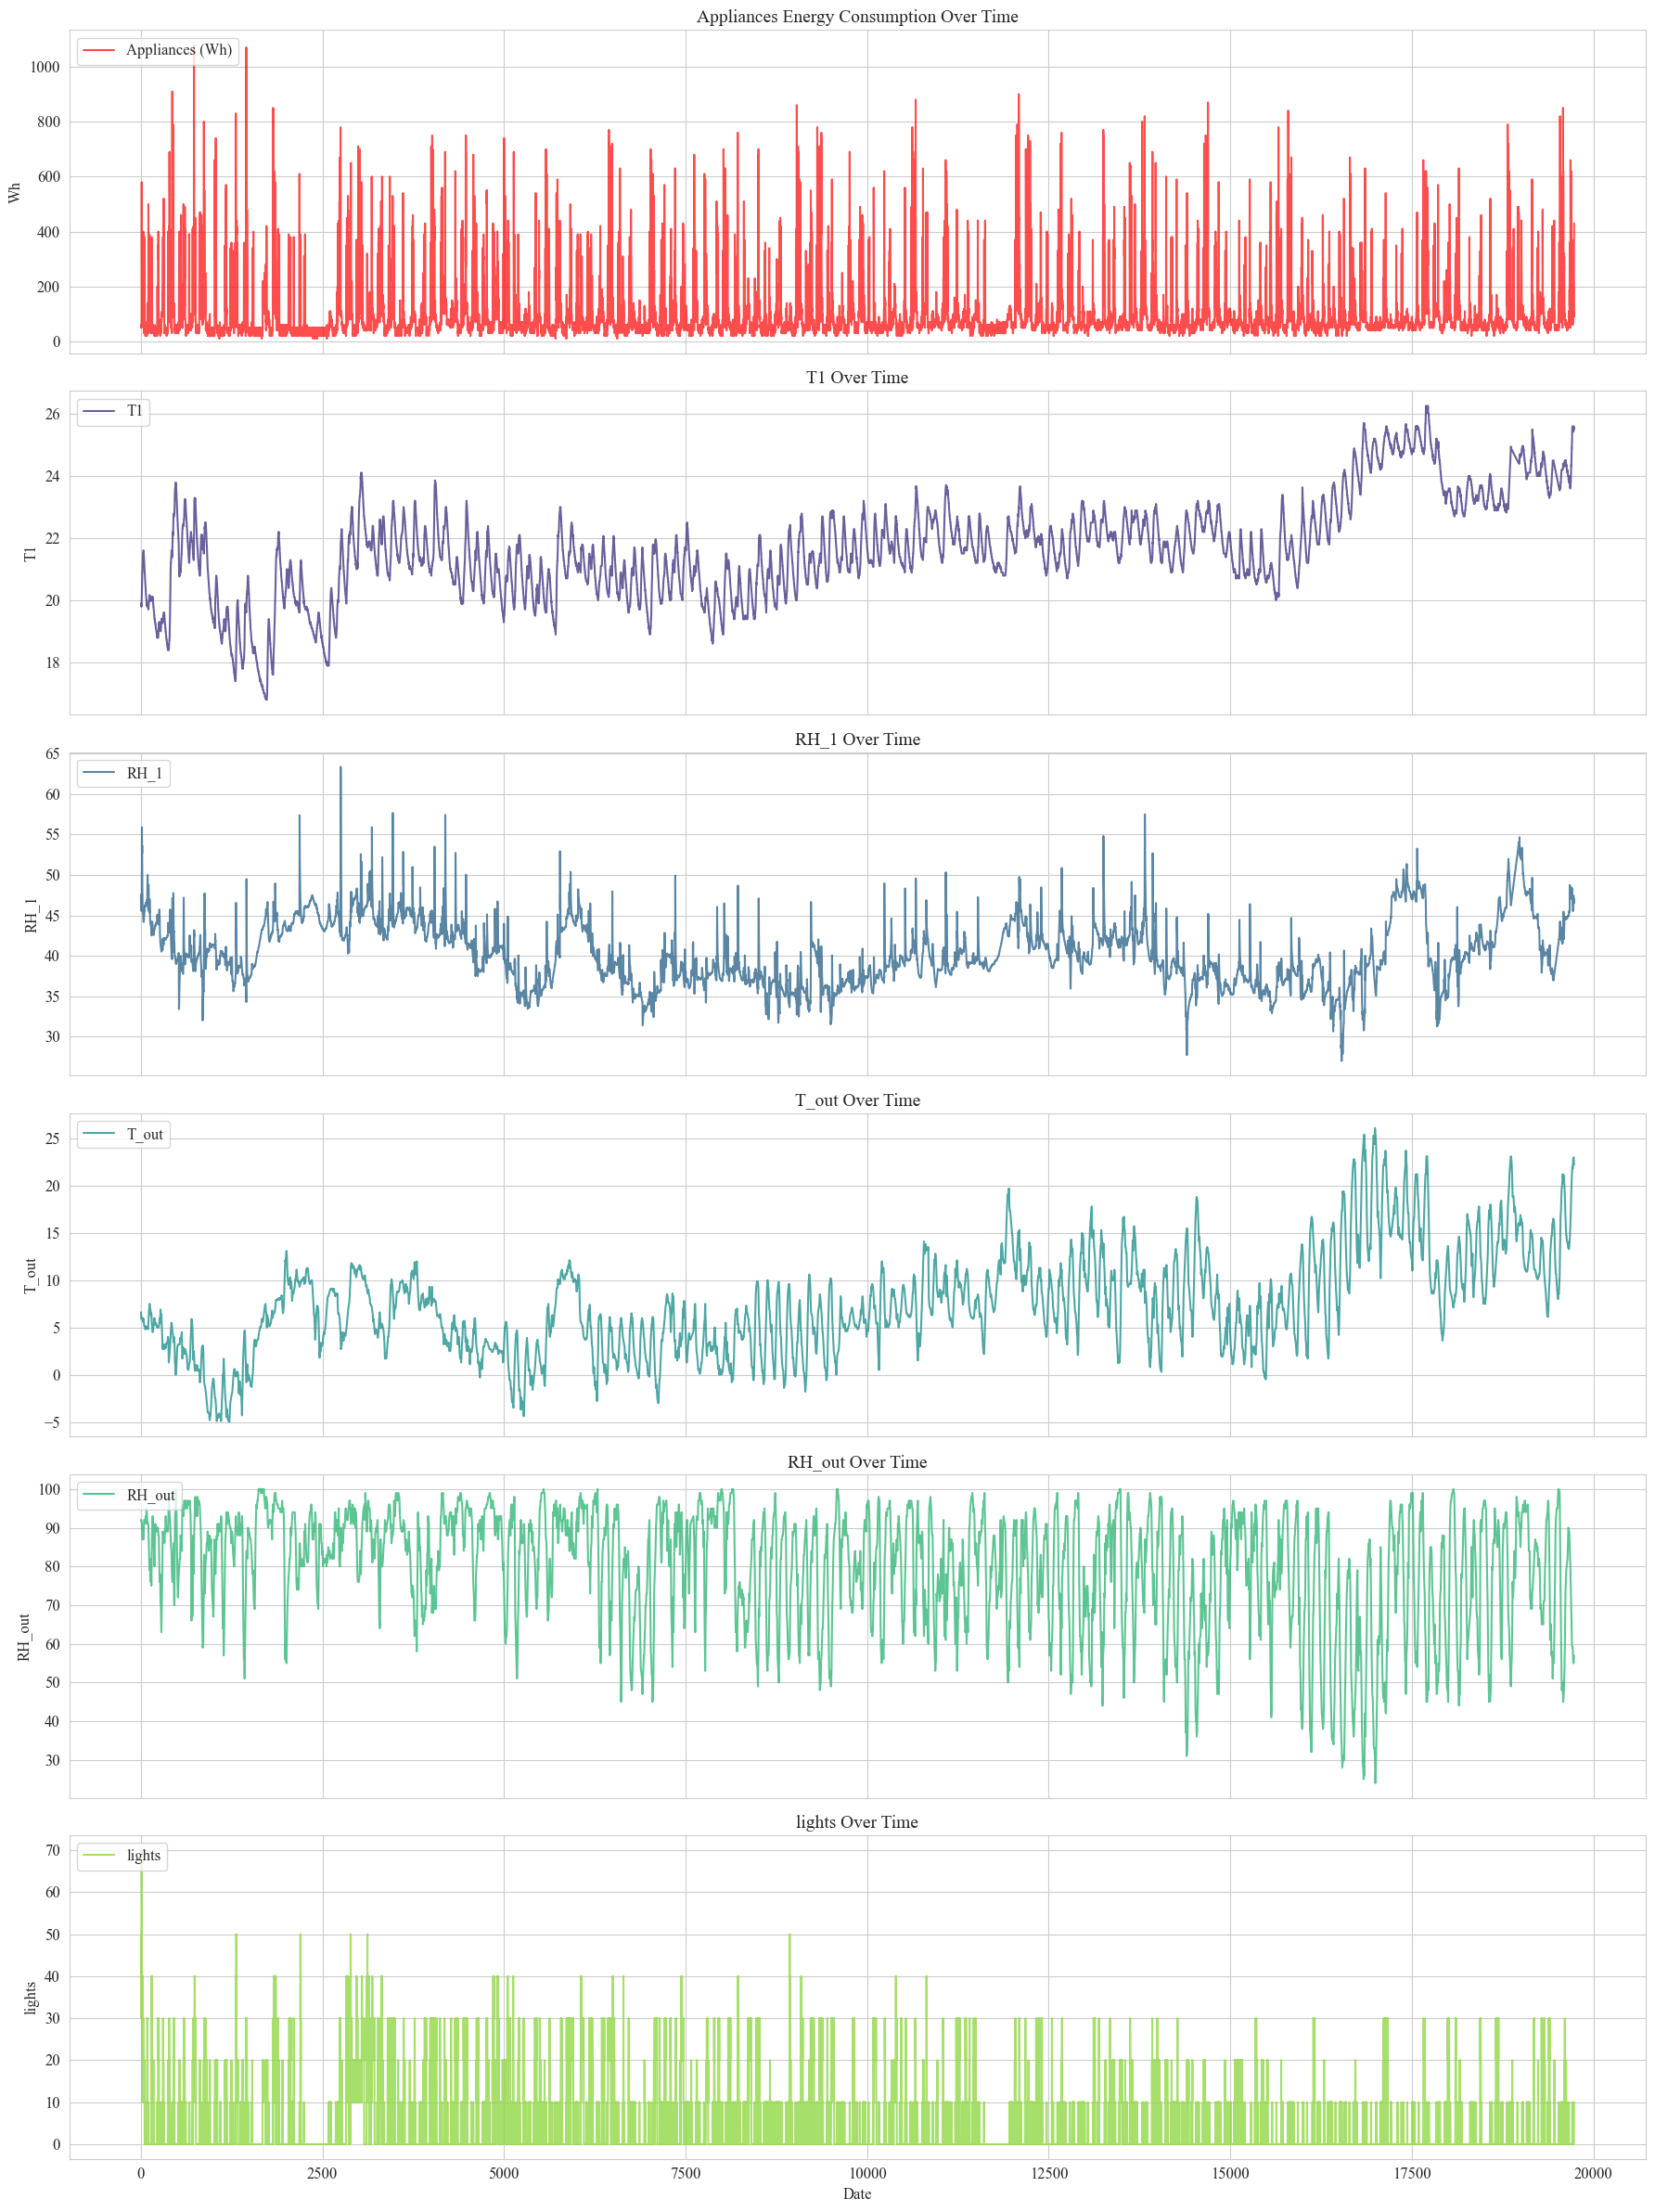


--- 7.3 'lights' 变量的特殊分析 ---
总记录数: 19735
lights 值为 0 的记录数: 15252 (77.28%)
lights 值大于 0 的记录数: 4483 (22.72%)


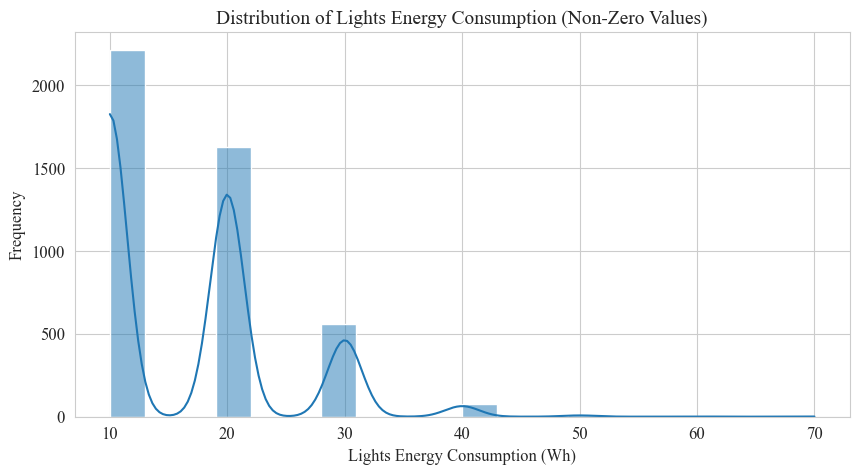

In [58]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'Appliances' in numerical_features:
    numerical_features.remove('Appliances')
if 'rv1' in numerical_features:
    numerical_features.remove('rv1')
if 'rv2' in numerical_features:
    numerical_features.remove('rv2')
if 'lights' in numerical_features: # lights 也会单独分析，但这里先包含在内
    pass


# 循环绘制每个数值特征的直方图/KDE图和箱线图
# 我们可以分批次绘制，避免一次性生成太多图表
num_plots_per_row = 2
num_features = len(numerical_features)

for i in range(0, num_features, num_plots_per_row):
    plt.figure(figsize=(16, 6 * num_plots_per_row)) # 调整图表大小以适应多个子图
    current_features = numerical_features[i : i + num_plots_per_row]

    for j, feature in enumerate(current_features):
        # 直方图/KDE图
        plt.subplot(num_plots_per_row, 2, 2*j + 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # 箱线图 (用于识别异常值)
        plt.subplot(num_plots_per_row, 2, 2*j + 2)
        sns.boxplot(y=df[feature])
        plt.title(f'Box Plot of {feature}', fontsize=14)
        plt.ylabel(feature, fontsize=12)

    plt.tight_layout()
    plt.show()

print("\n--- 7.2 关键特征的时间序列趋势 ---")

# 选择几个重要的外部特征，观察它们与 Appliances 的同步性
# 室内温度和湿度：T1, RH_1 (厨房)
# 室外温度和湿度：T_out, RH_out
# 另一个能耗：lights
key_external_features = ['T1', 'RH_1', 'T_out', 'RH_out', 'lights']

# 绘制 Appliances 和这些关键特征的整体趋势图
plt.figure(figsize=(18, 10))
plt.plot(df.index, df['Appliances'], label='Appliances (Wh)', color='red', alpha=0.7)

# 由于各特征的尺度差异大，我们可以在同一个图上绘制，但要小心解读，或者使用多个子图共享X轴
# 考虑到清晰性，我们使用多个子图共享X轴
fig, axes = plt.subplots(len(key_external_features) + 1, 1, figsize=(18, 4 * (len(key_external_features) + 1)), sharex=True)

# 绘制 Appliances
axes[0].plot(df.index, df['Appliances'], label='Appliances (Wh)', color='red', alpha=0.7)
axes[0].set_title('Appliances Energy Consumption Over Time', fontsize=14)
axes[0].set_ylabel('Wh', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(True)

# 绘制其他关键特征
for i, feature in enumerate(key_external_features):
    axes[i+1].plot(df.index, df[feature], label=feature, color=sns.color_palette("viridis", len(key_external_features))[i], alpha=0.8)
    axes[i+1].set_title(f'{feature} Over Time', fontsize=14)
    axes[i+1].set_ylabel(feature, fontsize=12)
    axes[i+1].legend(loc='upper left')
    axes[i+1].grid(True)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

print("\n--- 7.3 'lights' 变量的特殊分析 ---")

# 统计 lights 值为 0 的频率
lights_zero_count = (df['lights'] == 0).sum()
lights_non_zero_count = (df['lights'] > 0).sum()
total_count = len(df)

print(f"总记录数: {total_count}")
print(f"lights 值为 0 的记录数: {lights_zero_count} ({lights_zero_count/total_count:.2%})")
print(f"lights 值大于 0 的记录数: {lights_non_zero_count} ({lights_non_zero_count/total_count:.2%})")

# 绘制 lights 变量的分布 (如果之前没有单独绘制)
# 鉴于其大量为0，直方图可能需要特别处理或放大非0部分
plt.figure(figsize=(10, 5))
sns.histplot(df['lights'][df['lights'] > 0], bins=20, kde=True) # 只看非零值
plt.title('Distribution of Lights Energy Consumption (Non-Zero Values)', fontsize=14)
plt.xlabel('Lights Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

特征与目标变量之间的关系


--- 8.1 相关性分析 ---
Appliances 与其他特征的相关性 (按绝对值排序)：


Appliances     1.000000
lights         0.197278
RH_out        -0.152282
T2             0.120073
T6             0.117638
T_out          0.099155
RH_8          -0.094039
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
T1             0.055447
RH_9          -0.051462
T4             0.040281
T8             0.039572
RH_3           0.036292
Press_mm_hg   -0.034885
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015357
rv1           -0.011145
T9             0.010010
RH_5           0.006955
Visibility     0.000230
Name: Appliances, dtype: float64

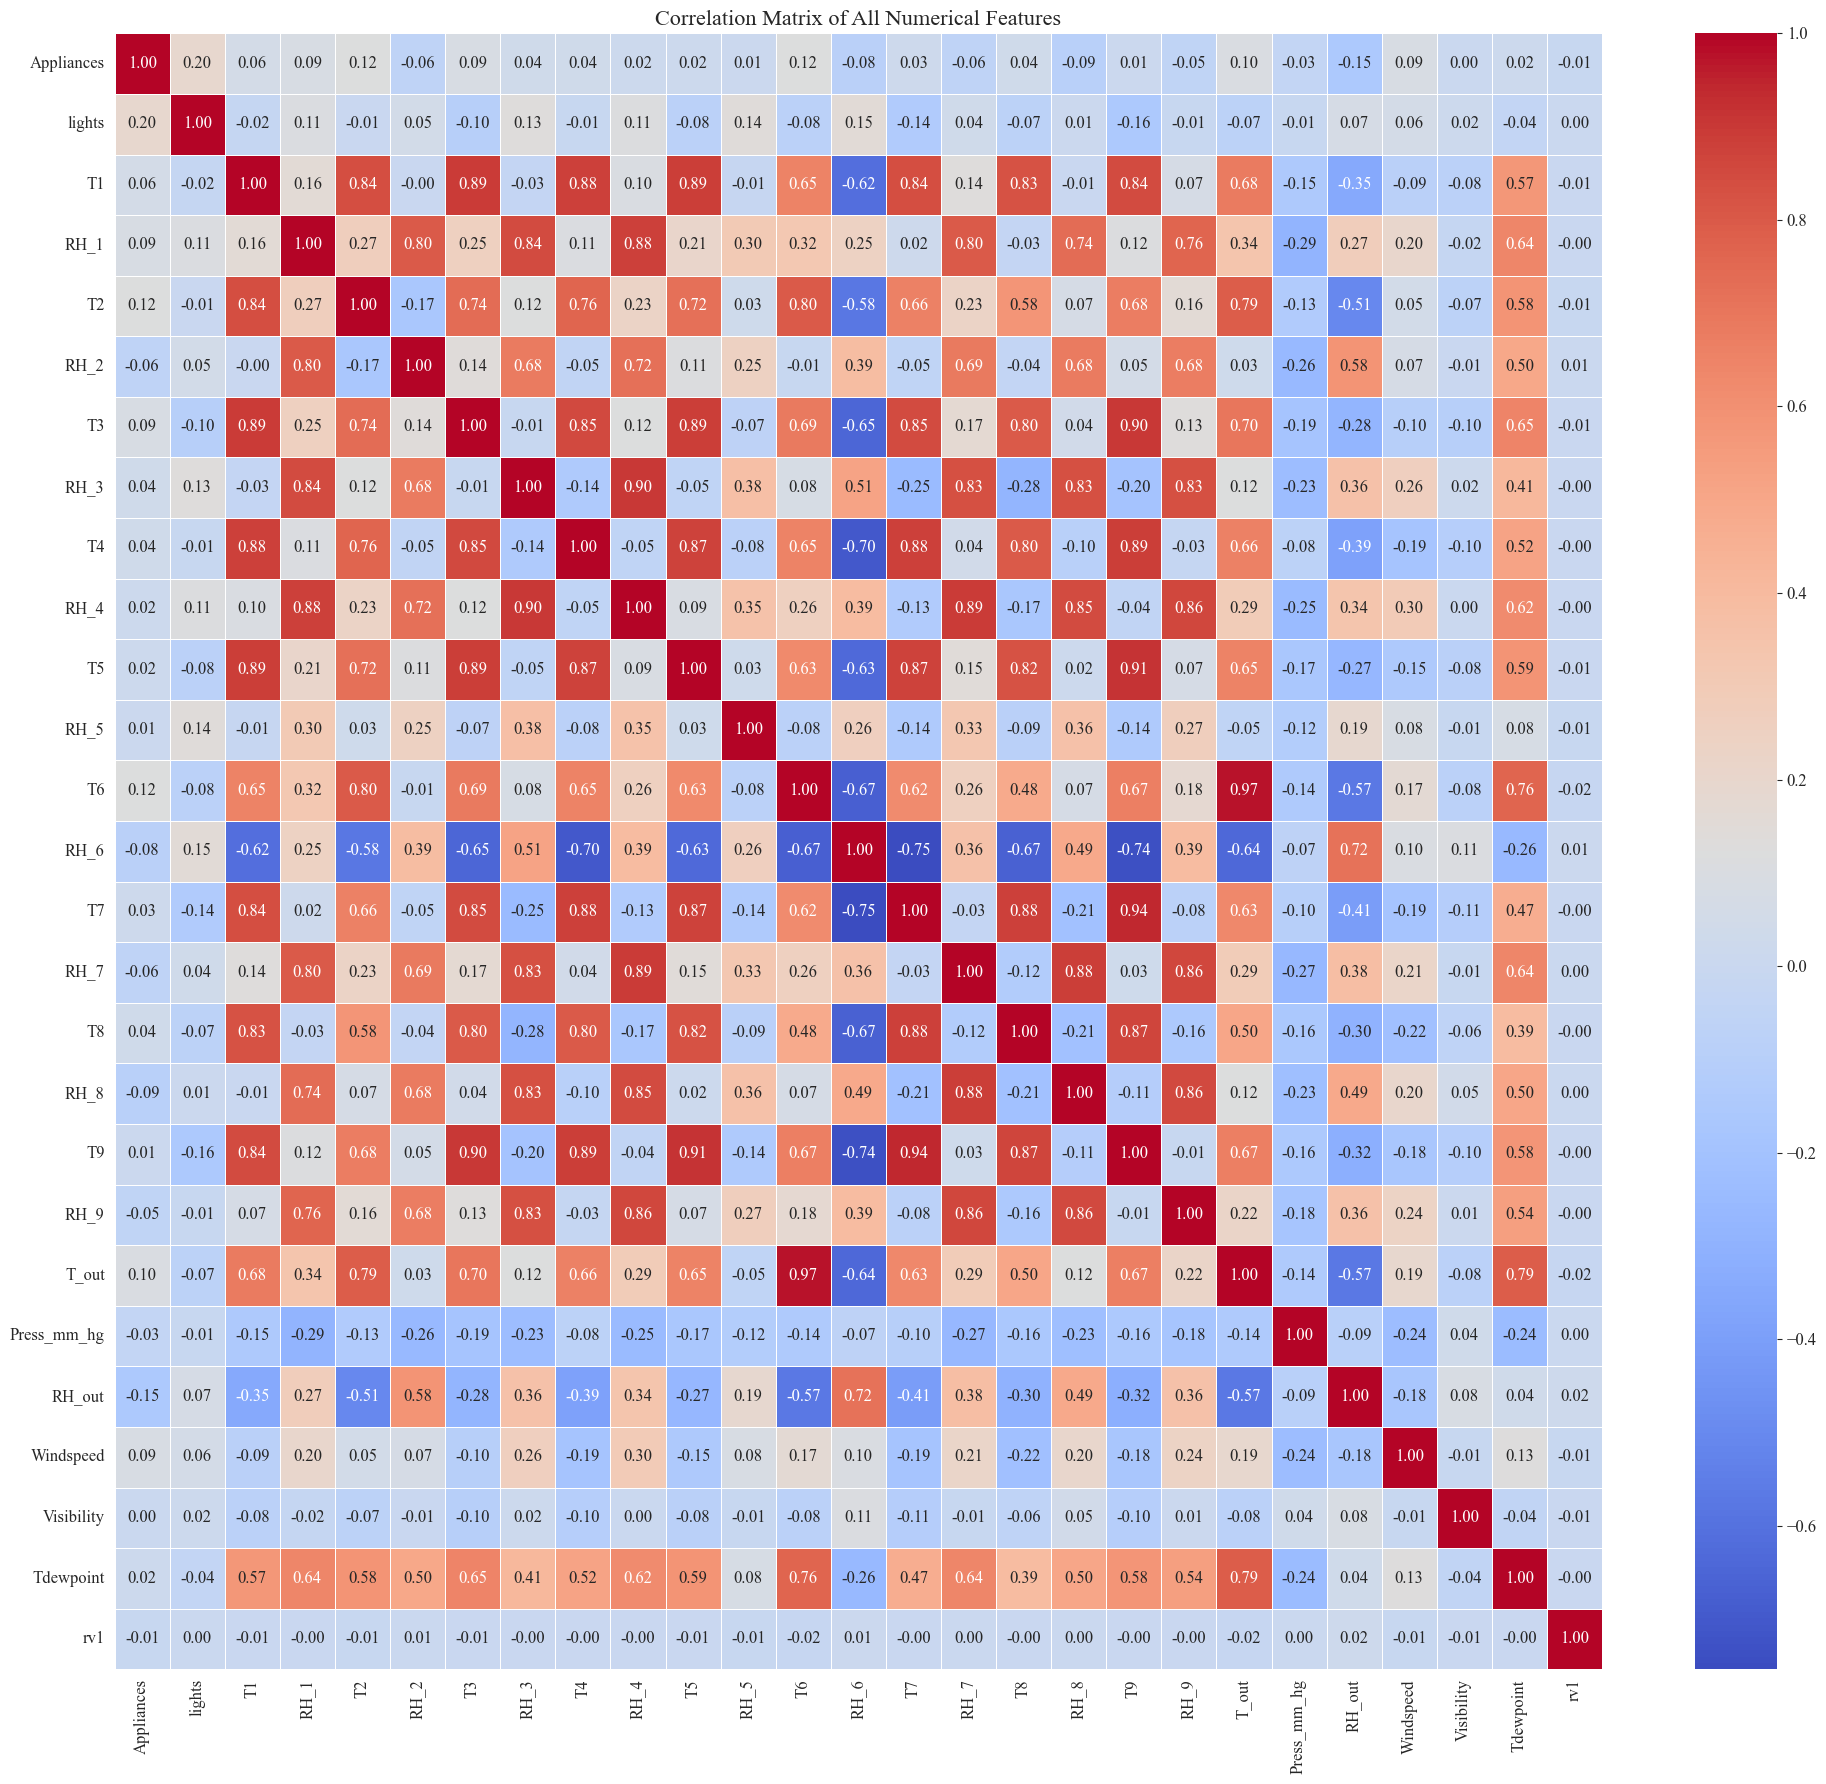


没有发现与 Appliances 相关性绝对值高于 0.3 的特征。

--- 8.2 散点图：Appliances 与几个相关性最高的特征 ---


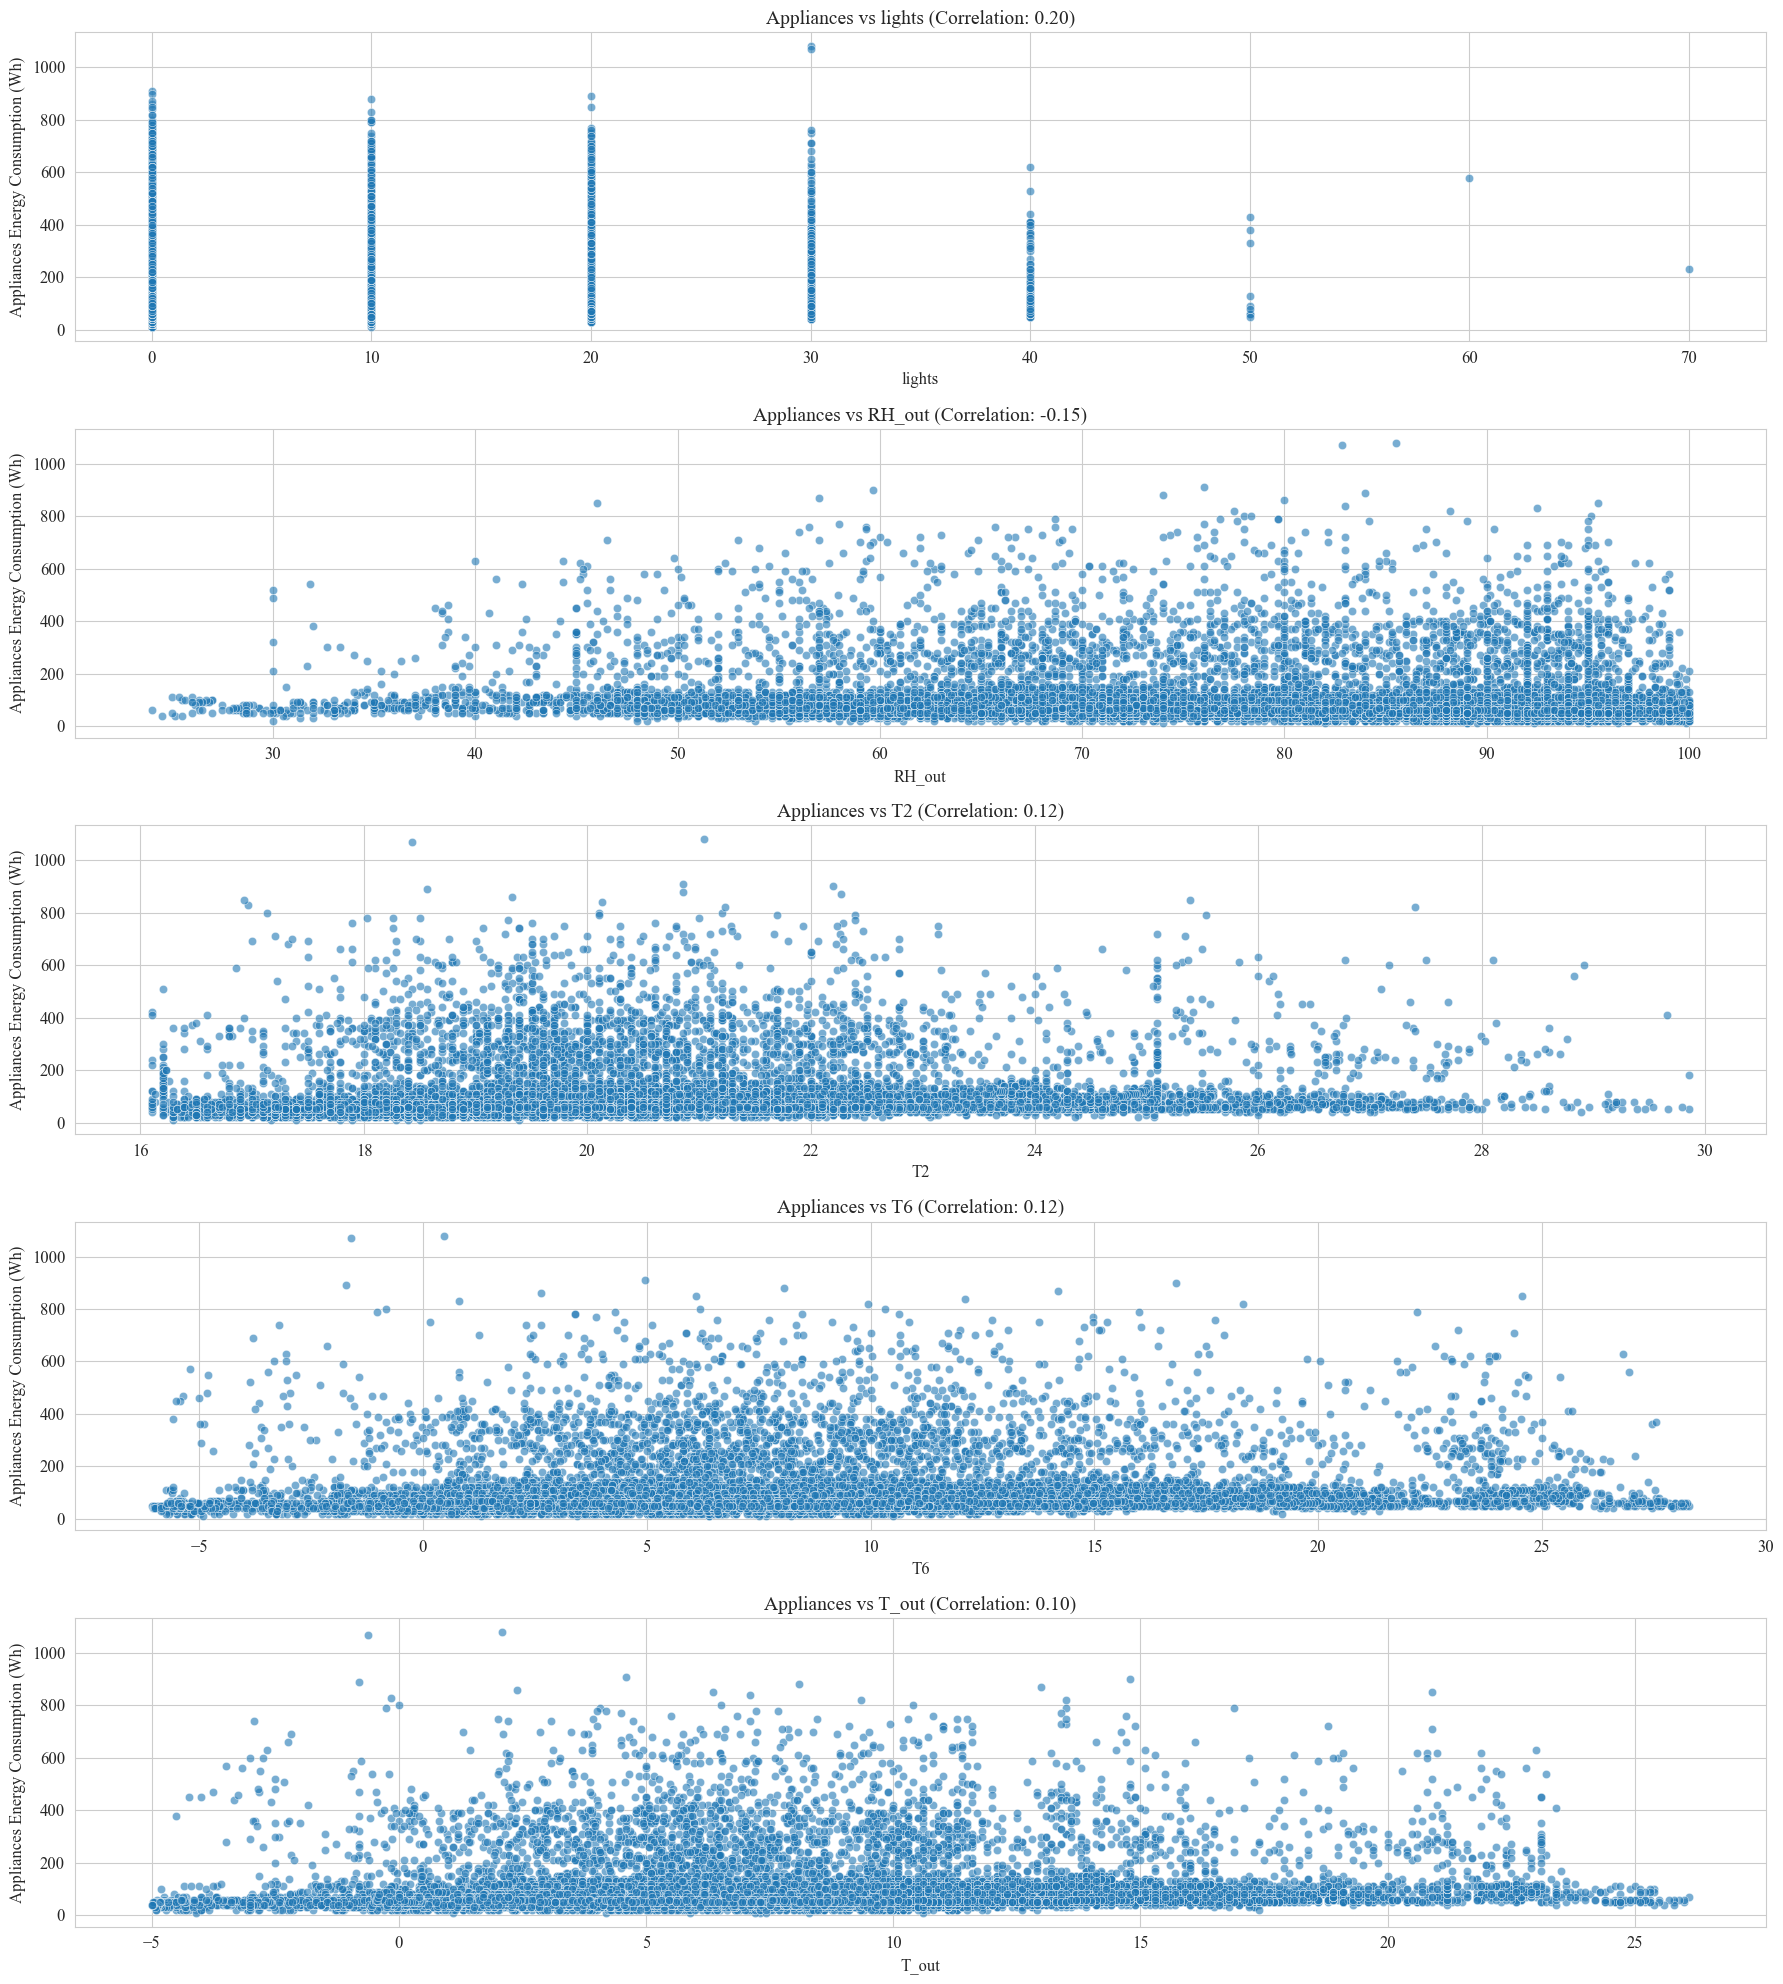

In [59]:
if df is not None:
    print("\n--- 8.1 相关性分析 ---")

    # 排除 'rv1' 或 'rv2' 中的一个，因为它们是冗余的
    # 假设我们选择保留 'rv1' 并删除 'rv2'，但现在只是为了相关性分析
    df_corr = df.copy()
    if 'rv2' in df_corr.columns:
        df_corr = df_corr.drop(columns=['rv2'])

    # 计算 Appliances 与所有其他数值特征之间的皮尔逊相关系数
    # 确保只选择数值列进行相关性计算
    correlation_matrix = df_corr.select_dtypes(include=np.number).corr()

    # 提取 Appliances 与其他特征的相关性
    appliances_correlations = correlation_matrix['Appliances'].sort_values(ascending=False)

    print("Appliances 与其他特征的相关性 (按绝对值排序)：")
    # 按照相关系数的绝对值进行排序，以便看到最强关联的特征，无论是正相关还是负相关
    display(appliances_correlations.reindex(appliances_correlations.abs().sort_values(ascending=False).index))

    # 可视化相关系数矩阵 (热力图)
    plt.figure(figsize=(20, 18)) # 调整图表大小以容纳所有特征
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of All Numerical Features', fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # 重点关注与 Appliances 相关性较高的特征
    # 我们可以设置一个相关性阈值，例如绝对值 > 0.3
    high_corr_features = appliances_correlations[appliances_correlations.abs() > 0.3].index.tolist()
    # 确保 Appliances 本身不包含在内，因为它与自己相关性为1
    if 'Appliances' in high_corr_features:
        high_corr_features.remove('Appliances')

    if high_corr_features:
        print(f"\n与 Appliances 相关性绝对值高于 0.3 的特征 ({len(high_corr_features)} 个):")
        for feature in high_corr_features:
            print(f"- {feature}: {appliances_correlations[feature]:.2f}")
    else:
        print("\n没有发现与 Appliances 相关性绝对值高于 0.3 的特征。")


    print("\n--- 8.2 散点图：Appliances 与几个相关性最高的特征 ---")

    # 选择几个相关性最高的特征进行散点图可视化
    # 我们可以从 high_corr_features 中选择，或者直接选择 top N
    top_n_corr_features = appliances_correlations.abs().sort_values(ascending=False).index.tolist()
    if 'Appliances' in top_n_corr_features:
        top_n_corr_features.remove('Appliances')

    # 选择前3-5个特征进行散点图绘制
    features_to_plot = top_n_corr_features[:5] # 选取前5个相关性最高的特征

    if features_to_plot:
        plt.figure(figsize=(18, 4 * len(features_to_plot)))
        for i, feature in enumerate(features_to_plot):
            plt.subplot(len(features_to_plot), 1, i + 1)
            sns.scatterplot(x=df[feature], y=df['Appliances'], alpha=0.6)
            plt.title(f'Appliances vs {feature} (Correlation: {appliances_correlations[feature]:.2f})', fontsize=14)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel('Appliances Energy Consumption (Wh)', fontsize=12)
            plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("没有足够的特征进行散点图可视化。")

else:
    print("DataFrame 未加载，无法进行特征与目标变量关系分析。")

基于时间的模式探索

In [60]:
if df is not None:
    print("\n--- 9.1 提取临时时间特征 ---")

    # 从 DataFrame 的 datetime 索引中提取时间特征
    # 注意：这些是临时的，仅用于EDA，实际特征工程会在专门的模块中进行
    df['hour_of_day'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek # 0=Monday, 6=Sunday
    df['month_of_year'] = df.index.month

    print("已提取 'hour_of_day', 'day_of_week', 'month_of_year' 特征。")
    display(df[['Appliances', 'hour_of_day', 'day_of_week', 'month_of_year']].head())

    print("\n--- 9.2 按时间单位聚合并绘制平均 Appliances 消耗量 ---")

    # 9.2.1 平均 Appliances 消耗量按小时的变化趋势图 (日周期模式)
    avg_appliances_by_hour = df.groupby('hour_of_day')['Appliances'].mean()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=avg_appliances_by_hour.index, y=avg_appliances_by_hour.values, marker='o')
    plt.title('Average Appliances Energy Consumption by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Appliances Energy Consumption (Wh)', fontsize=12)
    plt.xticks(range(0, 24)) # 确保X轴显示所有小时
    plt.grid(True)
    plt.show()
    print("观察：通常会显示白天能耗高，夜晚能耗低的日周期模式。")


    # 9.2.2 平均 Appliances 消耗量按星期几的变化趋势图 (工作日/周末差异)
    avg_appliances_by_dayofweek = df.groupby('day_of_week')['Appliances'].mean()
    # 将星期几的数字转换为名称，使图表更易读
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    avg_appliances_by_dayofweek.index = avg_appliances_by_dayofweek.index.map(lambda x: day_names[x])

    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_appliances_by_dayofweek.index, y=avg_appliances_by_dayofweek.values, palette='viridis')
    plt.title('Average Appliances Energy Consumption by Day of Week', fontsize=14)
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Average Appliances Energy Consumption (Wh)', fontsize=12)
    plt.grid(axis='y')
    plt.show()
    print("观察：可能会揭示工作日和周末能耗的差异。")


    # 9.2.3 平均 Appliances 消耗量按月份的变化趋势图
    avg_appliances_by_month = df.groupby('month_of_year')['Appliances'].mean()
    # 将月份数字转换为名称，使图表更易读
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    avg_appliances_by_month.index = avg_appliances_by_month.index.map(lambda x: month_names[x-1]) # 月份从1开始

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=avg_appliances_by_month.index, y=avg_appliances_by_month.values, marker='o')
    plt.title('Average Appliances Energy Consumption by Month of Year', fontsize=14)
    plt.xlabel('Month of Year', fontsize=12)
    plt.ylabel('Average Appliances Energy Consumption (Wh)', fontsize=12)
    plt.grid(True)
    plt.show()
    print("观察：如果数据跨越足够长的月份，可能会显示季节性模式（例如，冬季或夏季能耗更高）。")


    print("\n--- 9.3 结合其他特征：不同 Day of Week 下 Appliances 随 Hour of Day 变化的模式 ---")

    # 计算不同星期几下，每小时的平均能耗
    avg_appliances_hourly_daily = df.groupby(['day_of_week', 'hour_of_day'])['Appliances'].mean().unstack()

    plt.figure(figsize=(16, 8))
    sns.heatmap(avg_appliances_hourly_daily, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
    plt.title('Average Appliances Energy Consumption (Wh) by Day of Week and Hour of Day', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Day of Week', fontsize=12)
    plt.yticks(ticks=np.arange(len(day_names)), labels=day_names, rotation=0) # 确保Y轴标签正确显示
    plt.tight_layout()
    plt.show()
    print("观察：更细致地揭示了不同工作日/周末的日周期模式差异。")


    # 清理临时创建的特征，以免影响后续步骤，因为这些会在特征工程模块中重新创建
    df.drop(columns=['hour_of_day', 'day_of_week', 'month_of_year'], inplace=True)
    print("\n已删除用于EDA的临时时间特征。")

else:
    print("DataFrame 未加载，无法进行基于时间的模式探索。")


--- 9.1 提取临时时间特征 ---


AttributeError: 'RangeIndex' object has no attribute 'hour'

EDA 总结与发现